## Property Investment Decision

Flipping Houses?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

### Preparing

In [2]:
data  = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Usually checking the info first
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Invistigating objects
# First is Date
data['date'].unique()

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

In [5]:
# Id like to narrow it down to year that it was sold
data['year_sold'] = pd.to_datetime(data['date']).dt.year

In [6]:
# Investigate sqft_basement column

data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [7]:
# Noticed a char '?'

data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
# '?' has 452 instances. Could be a placeholder or does not have a basement
# 0.0 has 12,826 instances out of 21,597 . This means 59% of houses do not have a basement
# Therefore I will treat '?' as 0.0

data['sqft_basement'] = data['sqft_basement'].replace("\?", 0, regex=True).astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
# Check data missing
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year_sold           0
dtype: int64

In [11]:
data['waterfront'].unique()

array([nan,  0.,  1.])

In [12]:
# It seems like it's a categorical that answers if the property is waterfront or not
data.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [13]:
# So filling NA as 0 and converting 'waterfront' to an integer as decimals are unnecessary
data['waterfront'] = data['waterfront'].fillna(0).astype(int)

In [14]:
data['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [15]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [16]:
# View looks to be categorical data (rating system)
# Majority of houses do not have a view rating plus small amount of NaN values
# Therefore I will treat NaN values as 0.

data['view'].fillna(0, inplace=True)

In [17]:
# Investigate yr_renovated column

data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [18]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [19]:
# Again yr_renovated looks to be categorical data (years)
# Majority have not been renovated. Makes sense in terms of real world application

data['yr_renovated'].fillna(0, inplace=True)

In [20]:
# And I want to categorize it based on whether the property was renovated or not.
data['renovated'] = data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [21]:
# rechecking

data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
renovated        0
dtype: int64

In [22]:
# Checking duplicates
data[data.duplicated(keep=False, subset=['id'])]

id        date      price  bedrooms  bathrooms  sqft_living  \
93     6021501535   7/25/2014   430000.0         3       1.50         1580   
94     6021501535  12/23/2014   700000.0         3       1.50         1580   
313    4139480200   6/18/2014  1380000.0         4       3.25         4290   
314    4139480200   12/9/2014  1400000.0         4       3.25         4290   
324    7520000520    9/5/2014   232000.0         2       1.00         1240   
...           ...         ...        ...       ...        ...          ...   
20654  8564860270   3/30/2015   502000.0         4       2.50         2680   
20763  6300000226   6/26/2014   240000.0         4       1.00         1200   
20764  6300000226    5/4/2015   380000.0         4       1.00         1200   
21564  7853420110   10/3/2014   594866.0         3       3.00         2780   
21565  7853420110    5/4/2015   625000.0         3       3.00         2780   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
93         5000     1.0           0   0.0  ...          290.0      1939   
94         5000     1.0           0   0.0  ...          290.0      1939   
313       12103     1.0           0   3.0  ...         1600.0      1997   
314       12103     1.0           0   3.0  ...         1600.0      1997   
324       12092     1.0           0   0.0  ...          280.0      1922   
...         ...     ...         ...   ...  ...            ...       ...   
20654      5539     2.0           0   0.0  ...            0.0      2013   
20763      2171     1.5           0   0.0  ...            0.0      1933   
20764      2171     1.5           0   0.0  ...            0.0      1933   
21564      6000     2.0           0   0.0  ...            0.0      2013   
21565      6000     2.0           0   0.0  ...            0.0      2013   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
93              0.0    98117  47.6870 -122.386           1570        4500   
94              0.0    98117  47.6870 -122.386           1570        4500   
313             0.0    98006  47.5503 -122.102           3860       11244   
314             0.0    98006  47.5503 -122.102           3860       11244   
324          1984.0    98146  47.4957 -122.352           1820        7460   
...             ...      ...      ...      ...            ...         ...   
20654           0.0    98045  47.4759 -121.734           2680        5992   
20763           0.0    98133  47.7076 -122.342           1130        1598   
20764           0.0    98133  47.7076 -122.342           1130        1598   
21564           0.0    98065  47.5184 -121.886           2850        6000   
21565           0.0    98065  47.5184 -121.886           2850        6000   

       year_sold  renovated  
93          2014          0  
94          2014          0  
313         2014          0  
314         2014          0  
324         2014          1  
...          ...        ...  
20654       2015          0  
20763       2014          0  
20764       2015          0  
21564       2014          0  
21565       2015          0  

[353 rows x 23 columns]

In [23]:
# Removing duplicates and retaining the first row for each duplicate entry.
data = data.drop_duplicates(keep='first', subset=['id'])

In [24]:
# making ID as index
data.set_index('id', drop=True, append=False, inplace=True)
data.index.name = None

In [25]:
data

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
7129300520  10/13/2014  221900.0         3       1.00         1180      5650   
6414100192   12/9/2014  538000.0         3       2.25         2570      7242   
5631500400   2/25/2015  180000.0         2       1.00          770     10000   
2487200875   12/9/2014  604000.0         4       3.00         1960      5000   
1954400510   2/18/2015  510000.0         3       2.00         1680      8080   
...                ...       ...       ...        ...          ...       ...   
263000018    5/21/2014  360000.0         3       2.50         1530      1131   
6600060120   2/23/2015  400000.0         4       2.50         2310      5813   
1523300141   6/23/2014  402101.0         2       0.75         1020      1350   
291310100    1/16/2015  400000.0         3       2.50         1600      2388   
1523300157  10/15/2014  325000.0         2       0.75         1020      1076   

            floors  waterfront  view  condition  ...  sqft_basement  yr_built  \
7129300520     1.0           0   0.0          3  ...            0.0      1955   
6414100192     2.0           0   0.0          3  ...          400.0      1951   
5631500400     1.0           0   0.0          3  ...            0.0      1933   
2487200875     1.0           0   0.0          5  ...          910.0      1965   
1954400510     1.0           0   0.0          3  ...            0.0      1987   
...            ...         ...   ...        ...  ...            ...       ...   
263000018      3.0           0   0.0          3  ...            0.0      2009   
6600060120     2.0           0   0.0          3  ...            0.0      2014   
1523300141     2.0           0   0.0          3  ...            0.0      2009   
291310100      2.0           0   0.0          3  ...            0.0      2004   
1523300157     2.0           0   0.0          3  ...            0.0      2008   

            yr_renovated  zipcode      lat     long  sqft_living15  \
7129300520           0.0    98178  47.5112 -122.257           1340   
6414100192        1991.0    98125  47.7210 -122.319           1690   
5631500400           0.0    98028  47.7379 -122.233           2720   
2487200875           0.0    98136  47.5208 -122.393           1360   
1954400510           0.0    98074  47.6168 -122.045           1800   
...                  ...      ...      ...      ...            ...   
263000018            0.0    98103  47.6993 -122.346           1530   
6600060120           0.0    98146  47.5107 -122.362           1830   
1523300141           0.0    98144  47.5944 -122.299           1020   
291310100            0.0    98027  47.5345 -122.069           1410   
1523300157           0.0    98144  47.5941 -122.299           1020   

            sqft_lot15  year_sold  renovated  
7129300520        5650       2014          0  
6414100192        7639       2014          1  
5631500400        8062       2015          0  
2487200875        5000       2014          0  
1954400510        7503       2015          0  
...                ...        ...        ...  
263000018         1509       2014          0  
6600060120        7200       2015          0  
1523300141        2007       2014          0  
291310100         1287       2015          0  
1523300157        1357       2014          0  

[21420 rows x 22 columns]

In [26]:
data.shape

(21420, 22)

In [27]:
data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.142000e+04  21420.000000  21420.000000  21420.000000  2.142000e+04   
mean   5.407393e+05      3.373950      2.118429   2083.132633  1.512804e+04   
std    3.679311e+05      0.925405      0.768720    918.808412  4.153080e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.225000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1920.000000  7.614000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069050e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21420.000000  21420.000000  21420.000000  21420.000000  21420.000000   
mean       1.495985      0.006816      0.233987      3.410784      7.662792   
std        0.540081      0.082280      0.765437      0.650035      1.171971   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

       ...  sqft_basement      yr_built  yr_renovated      zipcode  \
count  ...   21420.000000  21420.000000  21420.000000  21420.00000   
mean   ...     285.904342   1971.092997     68.956723  98077.87437   
std    ...     440.008202     29.387141    364.552298     53.47748   
min    ...       0.000000   1900.000000      0.000000  98001.00000   
25%    ...       0.000000   1952.000000      0.000000  98033.00000   
50%    ...       0.000000   1975.000000      0.000000  98065.00000   
75%    ...     550.000000   1997.000000      0.000000  98117.00000   
max    ...    4820.000000   2015.000000   2015.000000  98199.00000   

                lat          long  sqft_living15     sqft_lot15     year_sold  \
count  21420.000000  21420.000000   21420.000000   21420.000000  21420.000000   
mean      47.560197   -122.213784    1988.384080   12775.718161   2014.318954   
std        0.138589      0.140791     685.537057   27345.621867      0.466082   
min       47.155900   -122.519000     399.000000     651.000000   2014.000000   
25%       47.471200   -122.328000    1490.000000    5100.000000   2014.000000   
50%       47.572100   -122.230000    1840.000000    7620.000000   2014.000000   
75%       47.678100   -122.125000    2370.000000   10086.250000   2015.000000   
max       47.777600   -121.315000    6210.000000  871200.000000   2015.000000   

          renovated  
count  21420.000000  
mean       0.034547  
std        0.182634  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 21 columns]

Noticed a weird number in the bedrooms column

In [28]:
# Checking
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [29]:
# Noticed a different number which is 33, checking details
data[data['bedrooms'] == 33]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2402100895  6/25/2014  640000.0        33       1.75         1620      6000   

            floors  waterfront  view  condition  ...  sqft_basement  yr_built  \
2402100895     1.0           0   0.0          5  ...          580.0      1947   

            yr_renovated  zipcode      lat     long  sqft_living15  \
2402100895           0.0    98103  47.6878 -122.331           1330   

            sqft_lot15  year_sold  renovated  
2402100895        4700       2014          0  

[1 rows x 22 columns]

In [30]:
# One house has 33 bedrooms and sqft_living of 1620. This is below the mean
# It is unlikely this house has 33 bedrooms, possibly a recording error
data['bedrooms'] = data['bedrooms'].replace(33, 3)

In [31]:
# Rechecking
data[data['bedrooms'] == 33]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, year_sold, renovated]
Index: []

[0 rows x 22 columns]

In [32]:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [33]:
data['floors'].value_counts()

1.0    10552
2.0     8203
1.5     1888
3.0      609
2.5      161
3.5        7
Name: floors, dtype: int64

In [34]:
# I feel like bathrooms has too much categories, checking
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [35]:
# narrowing it down to whole numbers
data['bathrooms'] = data['bathrooms'].round().astype(int)

In [36]:
data['bathrooms'].unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8])

In [37]:
# Would like to round off floors
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [38]:
# narrowing it down to whole numbers
data['floors'] = data['floors'].round().astype(int)

In [39]:
data['floors'].unique()

array([1, 2, 3, 4])

In [40]:
# narrowing it down to whole numbers
data['view'] = data['view'].astype(int)

In [41]:
# Same as the yr_built, checking
unique_years = data['yr_built'].unique()
np.sort(unique_years)

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [42]:
# Narrowing it down to a 3 bins categorised by half century
# Convert yr_built;
# 1900 to 1950 = yr_1900-1950
# 1951 to 2000 = yr_1951-1900
# 2001 to 2015 = yr_2001-2015

def half_cent(year):
    if 1899 < year < 1951:
        return 1
    elif 1950 < year < 2000:
        return 2
    else: return 3

In [43]:
data['yr_built'] = data['yr_built'].apply(half_cent)

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
data

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
7129300520  10/13/2014  221900.0         3          1         1180      5650   
6414100192   12/9/2014  538000.0         3          2         2570      7242   
5631500400   2/25/2015  180000.0         2          1          770     10000   
2487200875   12/9/2014  604000.0         4          3         1960      5000   
1954400510   2/18/2015  510000.0         3          2         1680      8080   
...                ...       ...       ...        ...          ...       ...   
263000018    5/21/2014  360000.0         3          2         1530      1131   
6600060120   2/23/2015  400000.0         4          2         2310      5813   
1523300141   6/23/2014  402101.0         2          1         1020      1350   
291310100    1/16/2015  400000.0         3          2         1600      2388   
1523300157  10/15/2014  325000.0         2          1         1020      1076   

            floors  waterfront  view  condition  grade  sqft_above  \
7129300520       1           0     0          3      7        1180   
6414100192       2           0     0          3      7        2170   
5631500400       1           0     0          3      6         770   
2487200875       1           0     0          5      7        1050   
1954400510       1           0     0          3      8        1680   
...            ...         ...   ...        ...    ...         ...   
263000018        3           0     0          3      8        1530   
6600060120       2           0     0          3      8        2310   
1523300141       2           0     0          3      7        1020   
291310100        2           0     0          3      8        1600   
1523300157       2           0     0          3      7        1020   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7129300520            0.0         2           0.0    98178  47.5112 -122.257   
6414100192          400.0         2        1991.0    98125  47.7210 -122.319   
5631500400            0.0         1           0.0    98028  47.7379 -122.233   
2487200875          910.0         2           0.0    98136  47.5208 -122.393   
1954400510            0.0         2           0.0    98074  47.6168 -122.045   
...                   ...       ...           ...      ...      ...      ...   
263000018             0.0         3           0.0    98103  47.6993 -122.346   
6600060120            0.0         3           0.0    98146  47.5107 -122.362   
1523300141            0.0         3           0.0    98144  47.5944 -122.299   
291310100             0.0         3           0.0    98027  47.5345 -122.069   
1523300157            0.0         3           0.0    98144  47.5941 -122.299   

            sqft_living15  sqft_lot15  year_sold  renovated  
7129300520           1340        5650       2014          0  
6414100192           1690        7639       2014          1  
5631500400           2720        8062       2015          0  
2487200875           1360        5000       2014          0  
1954400510           1800        7503       2015          0  
...                   ...         ...        ...        ...  
263000018            1530        1509       2014          0  
6600060120           1830        7200       2015          0  
1523300141           1020        2007       2014          0  
291310100            1410        1287       2015          0  
1523300157           1020        1357       2014          0  

[21420 rows x 22 columns]

In [46]:
# Droppping columns
data.drop(columns=['date', 'yr_renovated', 'lat', 'long'], inplace = True)

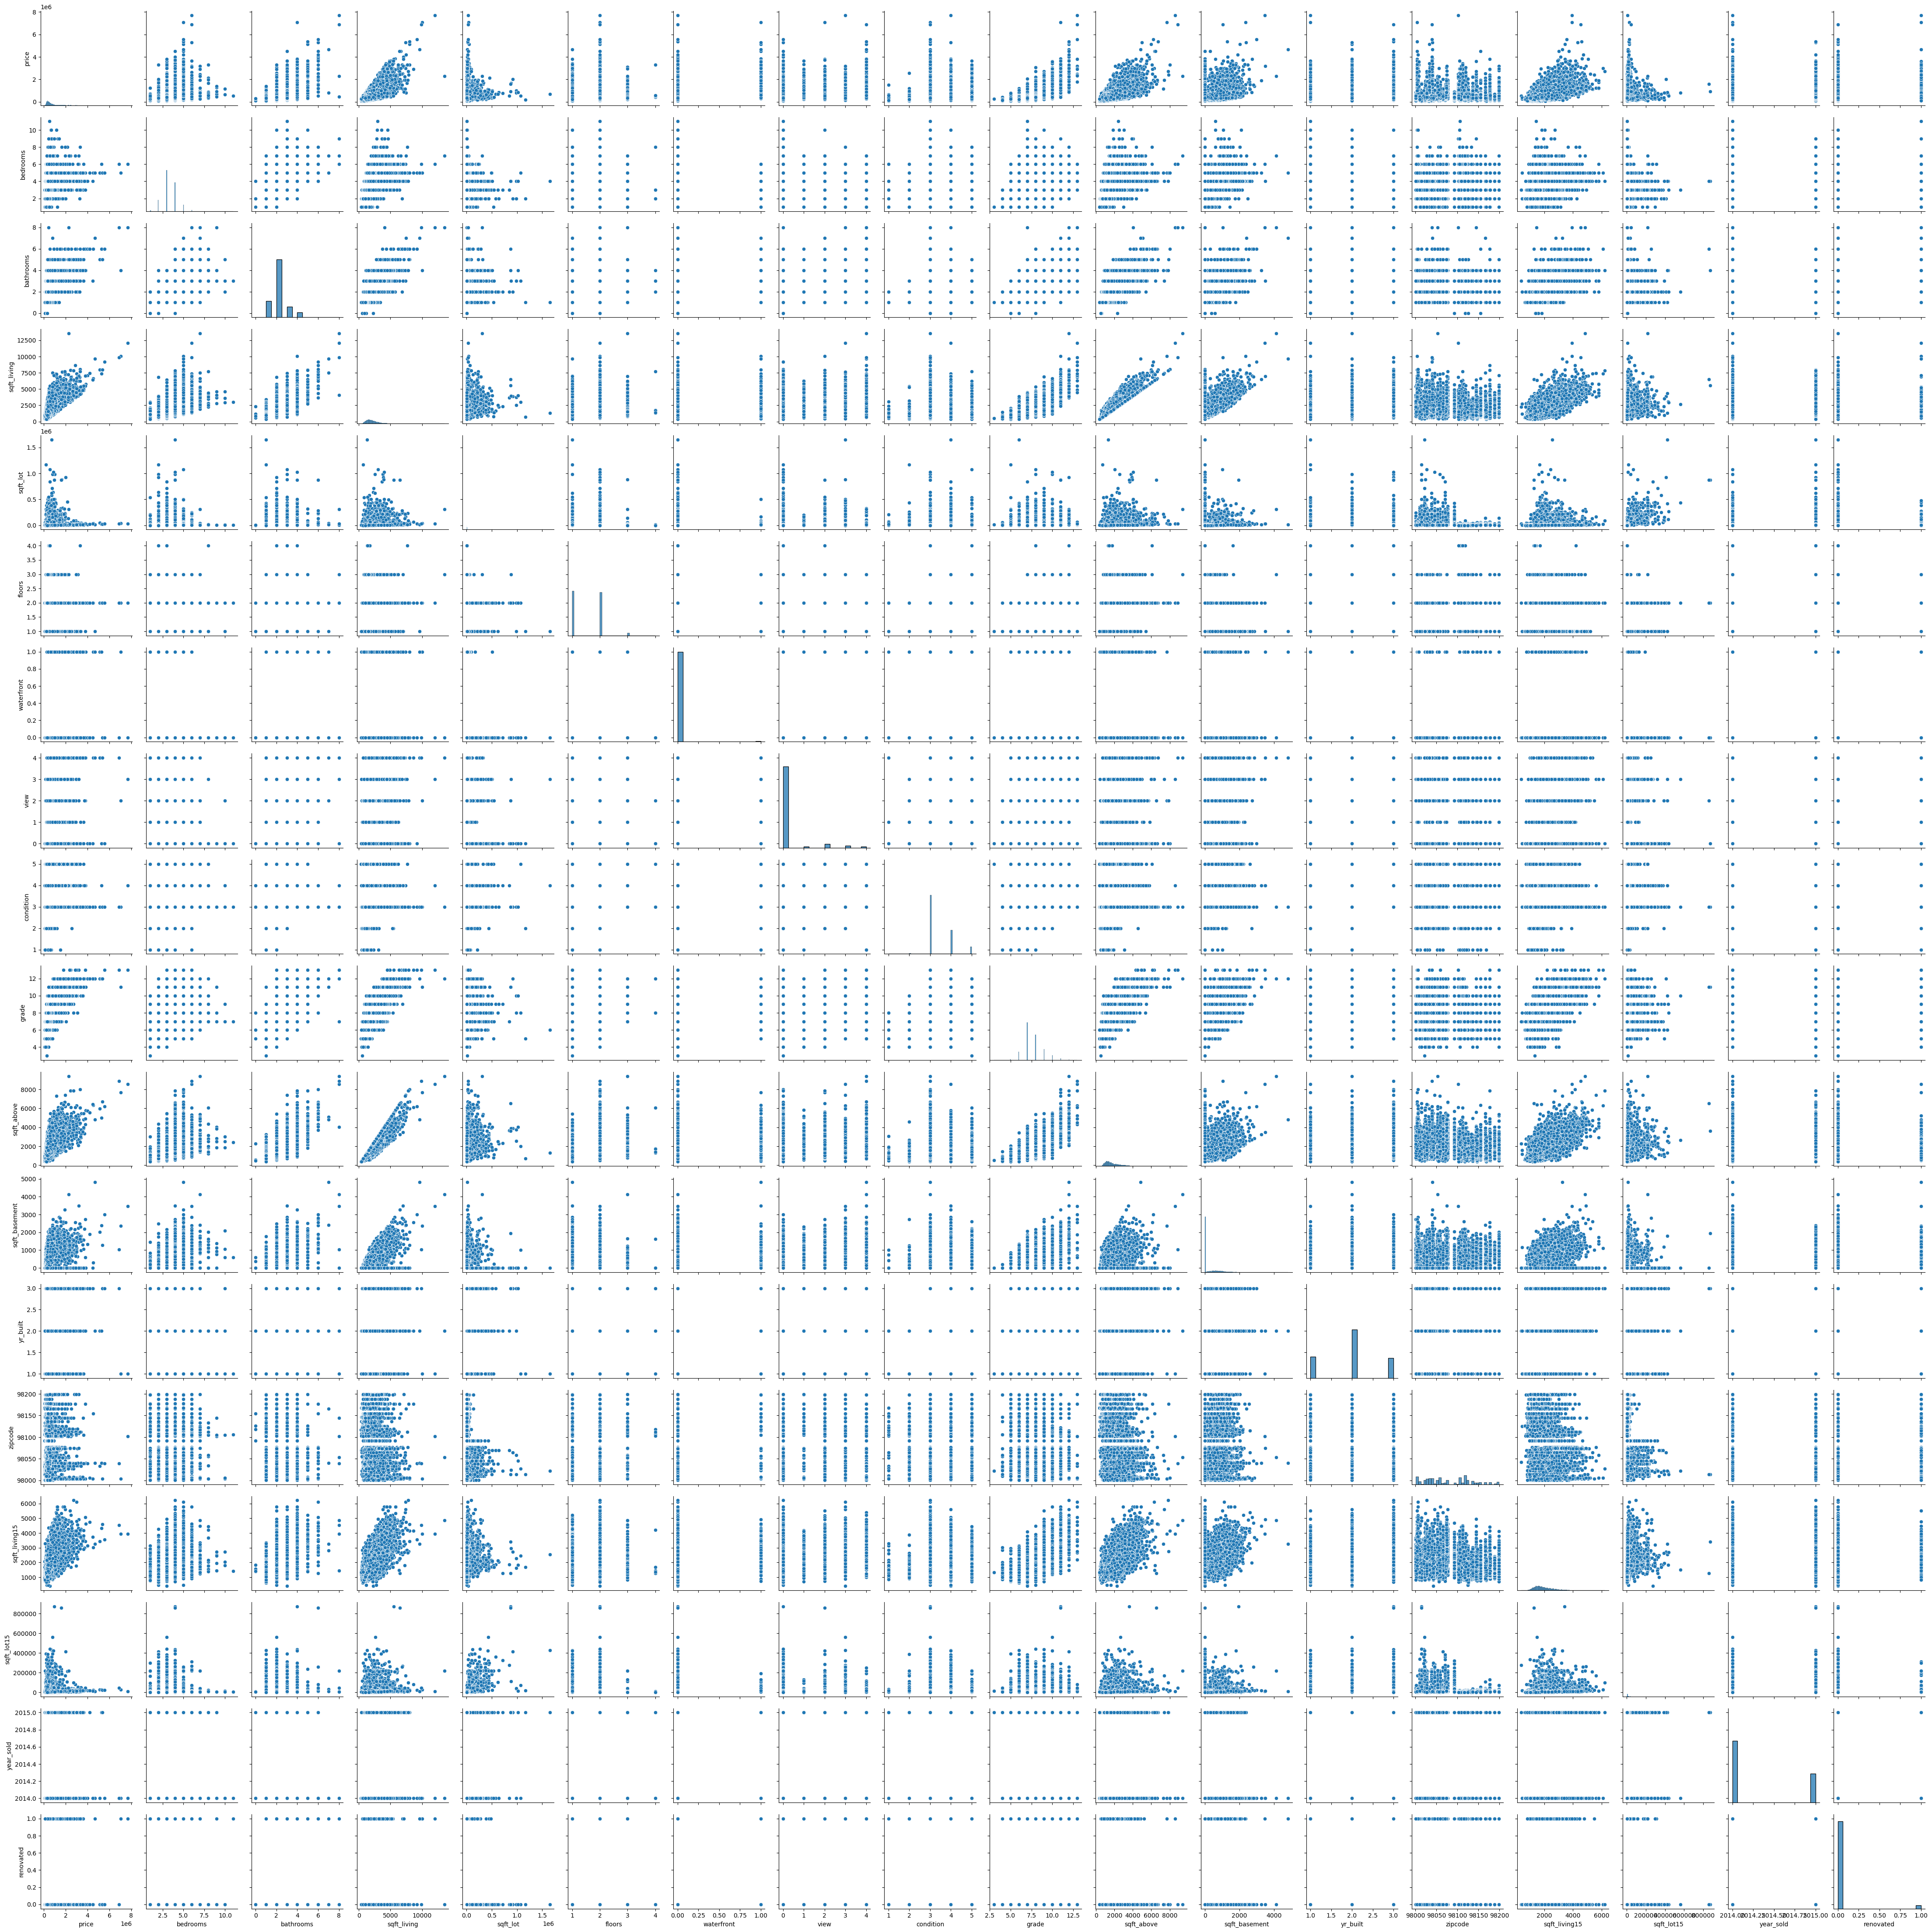

In [47]:
sns.pairplot(data);

In [48]:
data.nunique()

price            3607
bedrooms           11
bathrooms           9
sqft_living      1034
sqft_lot         9776
floors              4
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     303
yr_built            3
zipcode            70
sqft_living15     777
sqft_lot15       8682
year_sold           2
renovated           2
dtype: int64

Seems like we have the following in:

Continues variables:
- price
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- sqft_living15
- sqft_lot15


Categorical variables:
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- yr_built
- zipcode
- year_sold
- renovated

Seems like I am okay with my EDA, Let's do our base model now

---
## Iteration 1

In [49]:
# Creating new df to avoid messing with the original one
df1 = data.copy()

In [50]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'year_sold', 'renovated'],
      dtype='object')

In [51]:
bedr_dummies = pd.get_dummies(df1['bedrooms'], prefix='bedr', drop_first=True)
bathr_dummies = pd.get_dummies(df1['bathrooms'], prefix='bathr', drop_first=True)
floors_dummies = pd.get_dummies(df1['floors'], prefix='floors', drop_first=True)
waterfr_dummies = pd.get_dummies(df1['waterfront'], prefix='waterfr', drop_first=True)
view_dummies = pd.get_dummies(df1['view'], prefix='view', drop_first=True)
cond_dummies = pd.get_dummies(df1['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(df1['grade'], prefix='grade', drop_first=True)
yr_built_dummies = pd.get_dummies(df1['yr_built'], prefix='yr_built', drop_first=True)
zip_dummies = pd.get_dummies(df1['zipcode'], prefix='zip', drop_first=True)
yr_sold_dummies = pd.get_dummies(df1['year_sold'], prefix='yr_sold', drop_first=True)
reno_dummies = pd.get_dummies(df1['renovated'], prefix='reno', drop_first=True)

In [52]:
df1 = df1.drop(['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built', 'zipcode', 'year_sold','renovated'], axis=1)

In [53]:
df1 = pd.concat([df1, bedr_dummies, bathr_dummies, floors_dummies, waterfr_dummies, view_dummies, cond_dummies, grade_dummies, yr_built_dummies, zip_dummies, yr_sold_dummies, reno_dummies], axis=1)

In [54]:
df1

price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
7129300520  221900.0         1180      5650        1180            0.0   
6414100192  538000.0         2570      7242        2170          400.0   
5631500400  180000.0          770     10000         770            0.0   
2487200875  604000.0         1960      5000        1050          910.0   
1954400510  510000.0         1680      8080        1680            0.0   
...              ...          ...       ...         ...            ...   
263000018   360000.0         1530      1131        1530            0.0   
6600060120  400000.0         2310      5813        2310            0.0   
1523300141  402101.0         1020      1350        1020            0.0   
291310100   400000.0         1600      2388        1600            0.0   
1523300157  325000.0         1020      1076        1020            0.0   

            sqft_living15  sqft_lot15  bedr_2  bedr_3  bedr_4  bedr_5  bedr_6  \
7129300520           1340        5650       0       1       0       0       0   
6414100192           1690        7639       0       1       0       0       0   
5631500400           2720        8062       1       0       0       0       0   
2487200875           1360        5000       0       0       1       0       0   
1954400510           1800        7503       0       1       0       0       0   
...                   ...         ...     ...     ...     ...     ...     ...   
263000018            1530        1509       0       1       0       0       0   
6600060120           1830        7200       0       0       1       0       0   
1523300141           1020        2007       1       0       0       0       0   
291310100            1410        1287       0       1       0       0       0   
1523300157           1020        1357       1       0       0       0       0   

            bedr_7  bedr_8  bedr_9  bedr_10  bedr_11  bathr_1  bathr_2  \
7129300520       0       0       0        0        0        1        0   
6414100192       0       0       0        0        0        0        1   
5631500400       0       0       0        0        0        1        0   
2487200875       0       0       0        0        0        0        0   
1954400510       0       0       0        0        0        0        1   
...            ...     ...     ...      ...      ...      ...      ...   
263000018        0       0       0        0        0        0        1   
6600060120       0       0       0        0        0        0        1   
1523300141       0       0       0        0        0        1        0   
291310100        0       0       0        0        0        0        1   
1523300157       0       0       0        0        0        1        0   

            bathr_3  bathr_4  bathr_5  bathr_6  bathr_7  bathr_8  floors_2  \
7129300520        0        0        0        0        0        0         0   
6414100192        0        0        0        0        0        0         1   
5631500400        0        0        0        0        0        0         0   
2487200875        1        0        0        0        0        0         0   
1954400510        0        0        0        0        0        0         0   
...             ...      ...      ...      ...      ...      ...       ...   
263000018         0        0        0        0        0        0         0   
6600060120        0        0        0        0        0        0         1   
1523300141        0        0        0        0        0        0         1   
291310100         0        0        0        0        0        0         1   
1523300157        0        0        0        0        0        0         1   

            floors_3  floors_4  waterfr_1  view_1  view_2  view_3  view_4  \
7129300520         0         0          0       0       0       0       0   
6414100192         0         0          0       0       0       0       0   
5631500400         0         0          0       0       0       0       0   
2487200875         

In [55]:
# Y = 'price'
# X = ('sqft_living + sqft_above + sqft_basement + sqft_lot + sqft_living15 + sqft_lot15 + C(bedrooms) + C(bathrooms) + C(floors) + C(waterfront) + C(view) + C(condition) + C(grade) + C(yr_built) + C(zipcode) + C(year_sold) + C(renovated)')

In [56]:
Y = 'price'
X = df1.drop(['price'], axis = 1)
X_columns = "+".join(X.columns)

In [57]:
# model = ols(formula = formula, data = dt_1_dummies).fit()
# model.summary()

In [58]:
ols_formula = Y + "~" + X_columns

OLS = ols(formula = ols_formula, data = df1)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     942.9
Date:                Tue, 26 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:33:14   Log-Likelihood:            -2.8525e+05
No. Observations:               21420   AIC:                         5.707e+05
Df Residuals:                   21300   BIC:                         5.717e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -8.63e+04   1.68e+05     -0.514      0.607   -4.15e+05    2.43e+05
sqft_living     101.2658     13.283      7.624      0.000      75.230     127.301
sqft_lot          0.2372      0.035      6.719      0.000       0.168       0.306
sqft_above       58.3390     13.336      4.375      0.000      32.200      84.478
sqft_basement    16.8333     13.162      1.279      0.201      -8.966      42.633
sqft_living15    20.5576      2.715      7.572      0.000      15.236      25.879
sqft_lot15       -0.1528      0.056     -2.747      0.006      -0.262      -0.044
bedr_2         9019.7295   1.14e+04      0.794      0.427   -1.32e+04    3.13e+04
bedr_3         2.323e+04   1.14e+04      2.037      0.042     881.257    4.56e+04
bedr_4         5840.8047   1.16e+04      0.501      0.616    -1.7e+04    2.87e+04
bedr_5        -5872.1124   1.23e+04     -0.478      0.632   -2.99e+04    1.82e+04
bedr_6        -2.793e+04    1.5e+04     -1.863      0.062   -5.73e+04    1450.639
bedr_7        -1.451e+05   2.72e+04     -5.333      0.000   -1.98e+05   -9.18e+04
bedr_8        -1.219e+04   4.31e+04     -0.283      0.777   -9.67e+04    7.23e+04
bedr_9        -3.679e+05   6.31e+04     -5.829      0.000   -4.92e+05   -2.44e+05
bedr_10       -3.208e+05   8.64e+04     -3.713      0.000    -4.9e+05   -1.51e+05
bedr_11       -6.176e+04   1.48e+05     -0.417      0.677   -3.52e+05    2.29e+05
bathr_1        2.998e+04   7.39e+04      0.406      0.685   -1.15e+05    1.75e+05
bathr_2        2.032e+04   7.39e+04      0.275      0.783   -1.25e+05    1.65e+05
bathr_3        3.525e+04    7.4e+04      0.476      0.634    -1.1e+05     1.8e+05
bathr_4        6.199e+04   7.41e+04      0.836      0.403   -8.33e+04    2.07e+05
bathr_5        2.829e+05   7.68e+04      3.683      0.000    1.32e+05    4.33e+05
bathr_6        3.891e+05    8.1e+04      4.803      0.000     2.3e+05    5.48e+05
bathr_7        2.831e+05    1.3e+05      2.185      0.029    2.91e+04    5.37e+05
bathr_8        1.278e+06    1.1e+05     11.650      0.000    1.06e+06    1.49e+06
floors_2      -2.036e+04   2960.222     -6.878      0.000   -2.62e+04   -1.46e+04
floors_3      -6.833e+04   7414.311     -9.216      0.000   -8.29e+04   -5.38e+04
floors_4       1.499e+04   5.63e+04      0.266      0.790   -9.54e+04    1.25e+05
waterfr_1      5.995e+05   1.53e+04     39.240      0.000     5.7e+05    6.29e+05
view_1         8.645e+04   8417.763     10.270      0.000       7e+04    1.03e+05
view_2         6.912e+04   5140.585     13.446      0.000     5.9e+04    7.92e+04
view_3         1.524e+05   7037.567     21.658      0.000    1.39e+05    1.66e+05
view_4          2.93e+05   1.07e+04     27.428      0.000    2.72e+05    3.14e+05
cond_2         9.518e+04   3.03e+04      3.139      0.002    3.58e+04    1.55e+05
cond_3         1.094e+05   2.82e+04      3.886   

 - **Skew**  = 1.862 indicates the model is positively skewed

 - **Kurtosis** = 23.591 suggests that the residuals in the OLS regression model have heavy tails, which can have implications for the validity of the model's assumptions and the reliability of its results. Further investigation and potentially some adjustments to the model or data preprocessing may be necessary to address this issue and improve the model's performance.
 
Also, the R-squared and Adjusted R-squared values are very close to each other, indicating that the inclusion of independent variables in the model does not significantly affect the model's explanatory power. This suggests that the independent variables included in the model are collectively explaining a substantial portion (about  69% to 68.9%) of the variance in the dependent variable.

We will address these issues while working to improve our R-squared and Adjusted R-squared values.

### Distribution and KDE

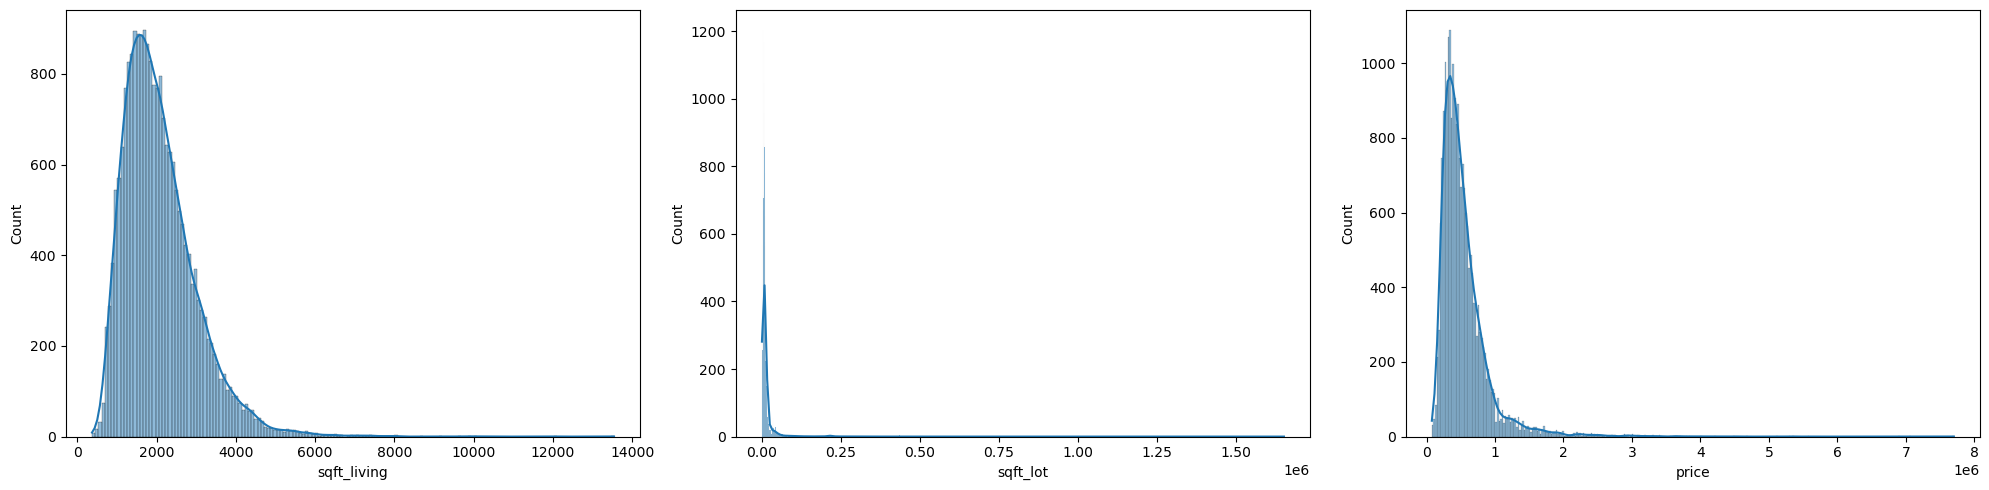

In [59]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
columns = ['sqft_living', 'sqft_lot','price']

sns.histplot(data=df1, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df1, x="sqft_lot", kde=True, ax=axes[1])
sns.histplot(data=df1, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

### Distribution and KDE comments

Normal distribution with positive skew

- price
- sqft_living
- sqft_lot

Positive skewness means that the tails of the distributions for these variables are longer on the right side (toward higher values), and most of the data points are concentrated on the left side (toward lower values).

### Model assumption: Linearity

Identify which variables have a linear relationship with the target variable price

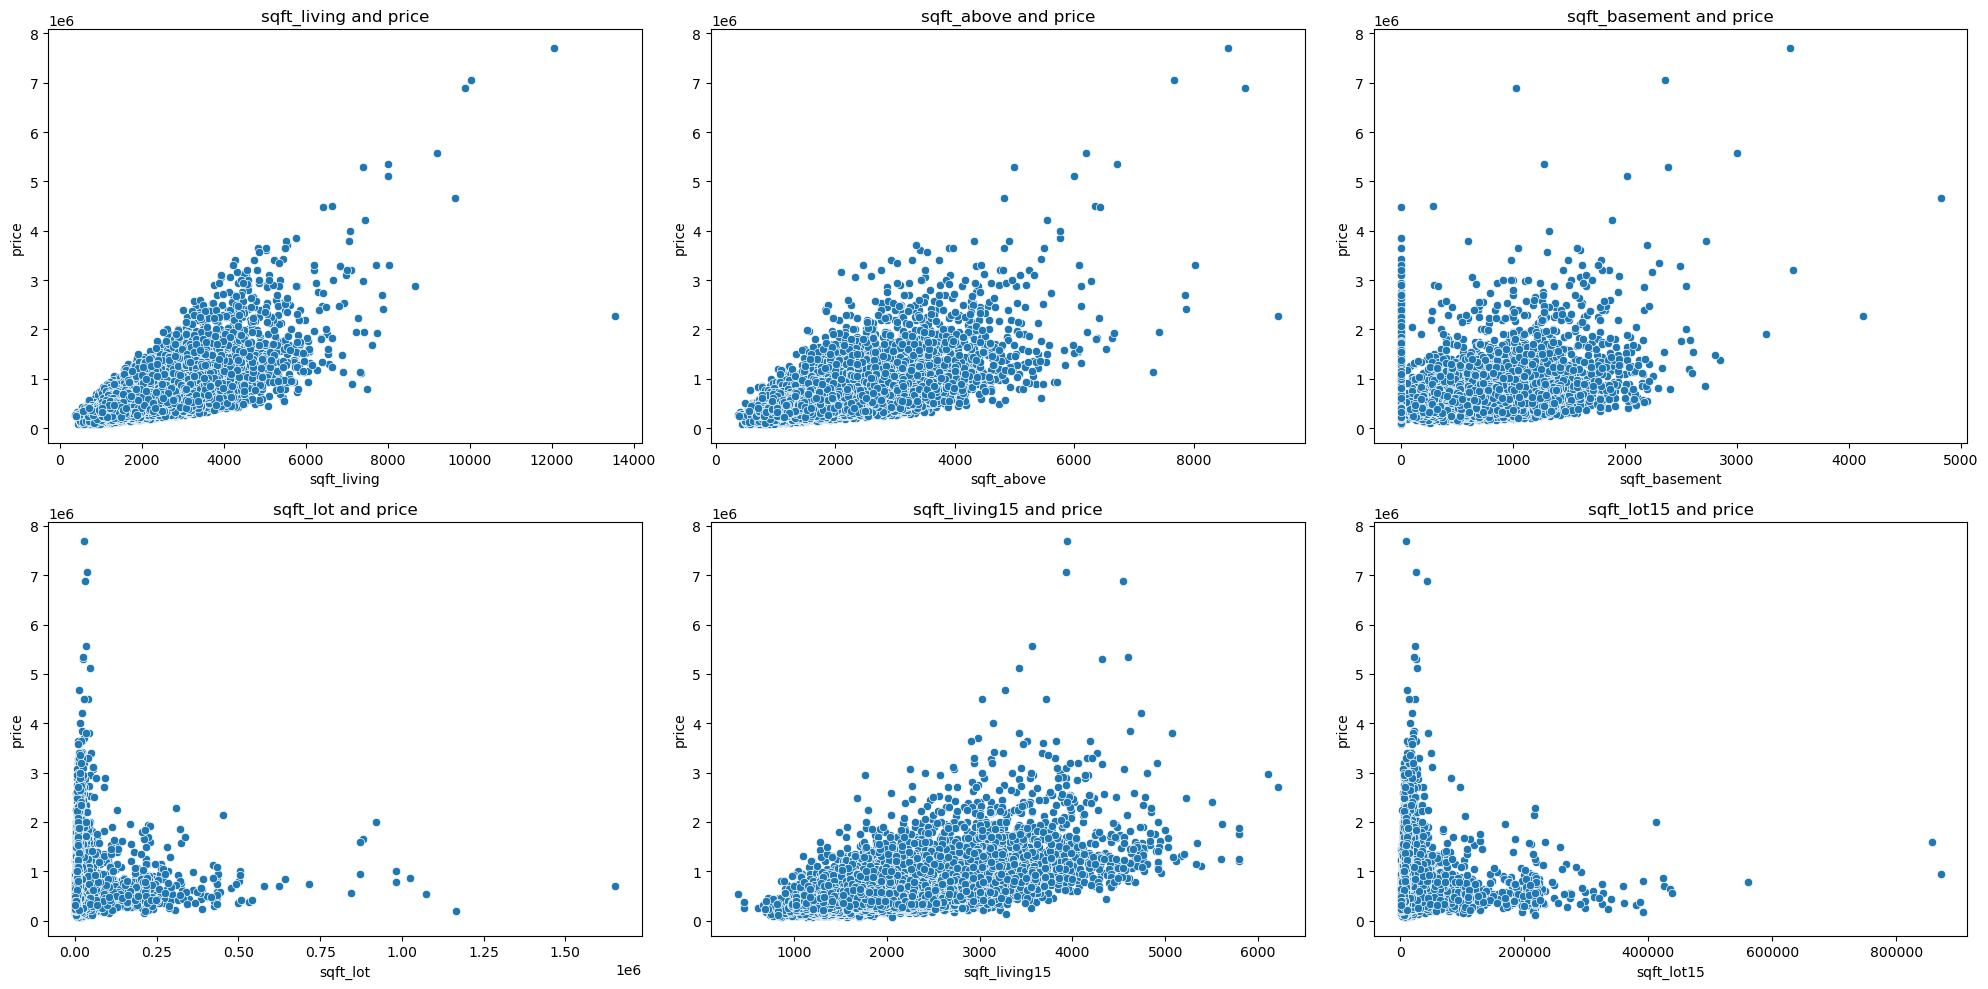

In [60]:
# sqft_living + sqft_above + sqft_basement + sqft_lot + sqft_living15 + sqft_lot15

fig, axes = plt.subplots(2, 3, figsize = (20,10))

sns.scatterplot(x = df1['sqft_living'], y = df1['price'],ax=axes[0][0])
axes[0][0].set_title("sqft_living and price")

sns.scatterplot(x = df1['sqft_above'], y = df1['price'],ax=axes[0][1])
axes[0][1].set_title("sqft_above and price")

sns.scatterplot(x = df1['sqft_basement'], y = df1['price'],ax=axes[0][2])
axes[0][2].set_title("sqft_basement and price")

sns.scatterplot(x = df1['sqft_lot'], y = df1['price'],ax=axes[1][0])
axes[1][0].set_title("sqft_lot and price")

sns.scatterplot(x = df1['sqft_living15'], y = df1['price'],ax=axes[1][1])
axes[1][1].set_title("sqft_living15 and price")

sns.scatterplot(x = df1['sqft_lot15'], y = df1['price'],ax=axes[1][2])
axes[1][2].set_title("sqft_lot15 and price")

plt.tight_layout()
plt.show()

Variables that have a strong linear relationship with price.
- sqft_living
- sqft_above
- sqft_living15

Variables that have a weak linear relationship with price.
- sqft_lot
- sqft_lot15

sqft_basement shows a strong linear relationship with price if there's any. We will just make this into category with a base of zero

### Model assumption: Normality

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

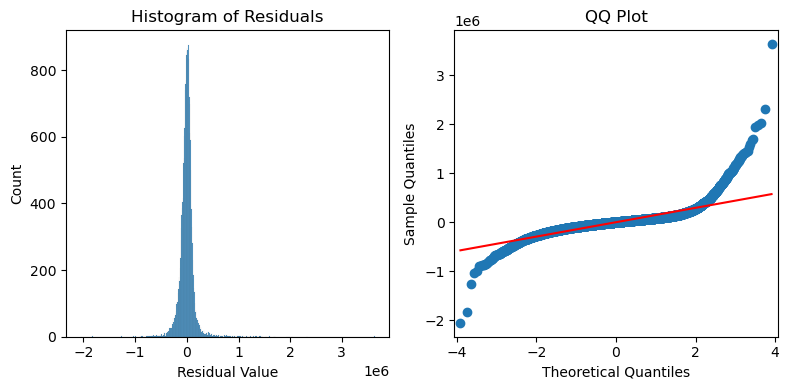

In [61]:
# Calculate the residuals.
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

- I believe the histogram exhibits a slight positive skew. Shows heavier tails than the normal distribution.
- The residuals in the Q-Q plot appear to form an almost straight line. Largest values are larger (more extreme) than would be expected. Will check outliers as well

### Model assumption: Constant variance

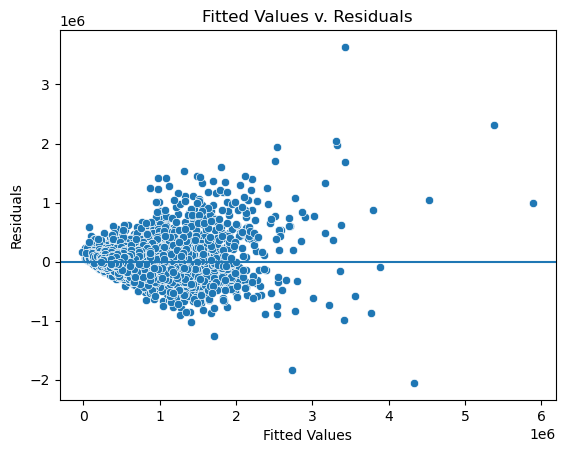

In [62]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

The variance of the residuals increases with X, indicating a violation of the constant variance assumption.

One potential solution to address this issue is to consider weighted regression, which can account for the changing variance. It's evident that the assumptions of the model may not hold under these circumstances.

### Model assumption: No multicollinearity

In [63]:
# Calculate the variance inflation factor (optional).

# variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# subset of the data with the continous independent variables. 
# sqft_living + sqft_above + sqft_basement + sqft_lot + sqft_living15 + sqft_lot15
X = df1[['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot', 'sqft_living15', 'sqft_lot15']]

# variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

VIF
sqft_living    868.971135
sqft_above     658.168494
sqft_basement   46.660589
sqft_lot         2.350843
sqft_living15   15.460750
sqft_lot15       2.547319

"sqft_living" and "sqft_above" have exceptionally high VIF values, suggesting strong multicollinearity. We may need to explore strategies to address this multicollinearity issue, such as removing one of these variables.

We will explore correlation.

In [64]:
df1.corr()

price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
price          1.000000     0.701875  0.089111    0.605294       0.320842   
sqft_living    0.701875     1.000000  0.172586    0.876533       0.428026   
sqft_lot       0.089111     0.172586  1.000000    0.183210       0.014859   
sqft_above     0.605294     0.876533  0.183210    1.000000      -0.051645   
sqft_basement  0.320842     0.428026  0.014859   -0.051645       1.000000   
...                 ...          ...       ...         ...            ...   
zip_98188     -0.054420    -0.024011 -0.009572   -0.028636       0.003222   
zip_98198     -0.073707    -0.041407 -0.012562   -0.043128      -0.005564   
zip_98199      0.083549     0.010537 -0.028546   -0.029486       0.077785   
yr_sold_2015   0.004956    -0.025785  0.006141   -0.020390      -0.014742   
reno_1         0.118179     0.050623  0.005105    0.019999       0.065309   

               sqft_living15  sqft_lot15    bedr_2    bedr_3    bedr_4  \
price               0.584549    0.082438 -0.145404 -0.184011  0.177128   
sqft_living         0.756186    0.183837 -0.350934 -0.273668  0.352851   
sqft_lot            0.143805    0.717743 -0.027689 -0.015101  0.026349   
sqft_above          0.731887    0.194445 -0.315647 -0.225932  0.338317   
sqft_basement       0.198197    0.015894 -0.136041 -0.142314  0.099282   
...                      ...         ...       ...       ...       ...   
zip_98188          -0.040616   -0.008781  0.001337 -0.002768 -0.000210   
zip_98198          -0.045325   -0.013652  0.013510  0.006710 -0.012387   
zip_98199           0.000706   -0.033533  0.028582 -0.006667 -0.005846   
yr_sold_2015       -0.018560    0.000597  0.006704  0.007230 -0.011065   
reno_1              0.000757    0.004413  0.002664 -0.018592  0.000212   

                 bedr_5    bedr_6    bedr_7    bedr_8    bedr_9   bedr_10  \
price          0.190248  0.089011  0.047059  0.037799  0.016072  0.008983   
sqft_living    0.299061  0.149544  0.086769  0.046049  0.030823  0.020914   
sqft_lot       0.011697  0.010002  0.005799 -0.003653 -0.003889 -0.001786   
sqft_above     0.212454  0.097098  0.069649  0.025860  0.023105  0.009505   
sqft_basement  0.217409  0.124596  0.045600  0.047792  0.021080  0.025933   
...                 ...       ...       ...       ...       ...       ...   
zip_98188      0.002262  0.012434 -0.003357 -0.001963 -0.001333 -0.000943   
zip_98198     -0.008492 -0.009012 -0.004808 -0.002810 -0.001909 -0.001350   
zip_98199     -0.012419 -0.003186  0.004043 -0.003015 -0.002048 -0.001448   
yr_sold_2015  -0.000330  0.004057 -0.009807 -0.008730  0.006502 -0.008099   
reno_1         0.011919  0.025080  0.016324 -0.004662  0.012109 -0.002239   

                bedr_11   bathr_1   bathr_2   bathr_3   bathr_4   bathr_5  \
price         -0.000385 -0.247894 -0.145871  0.204115  0.355322  0.183453   
sqft_living    0.006819 -0.463177 -0.062656  0.291486  0.427240  0.167378   
sqft_lot      -0.001673 -0.040467 -0.027244  0.037815  0.056101  0.018401   
sqft_above     0.005020 -0.397063 -0.042756  0.222334  0.381322  0.148484   
sqft_basement  0.004878 -0.214536 -0.049080  0.185704  0.170180  0.070577   
...                 ...       ...       ...       ...       ...       ...   
zip_98188     -0.000544  0.025430 -0.014306 -0.007057 -0.001382 -0.004114   
zip_98198     -0.000779  0.031546 -0.009050 -0.010678 -0.016896 -0.005891   
zip_98199     -0.000836 -0.008187 -0.005471 -0.001326  0.027585  0.001196   
yr_sold_2015  -0.004676  0.021782 -0.005437 -0.015611  0.000232 -0.010073   
reno_1         0.036121 -0.018466 -0.043102  0.055677  0.039726  0.000153   

                bathr_6   bathr_7   bathr_8  floors_2  floors_3  floors_4  \
price          0.187814  0.057631  0.140753  0.256233  0.019773  0.018157   
sqft_living    0.169799  0.068120  0.116013  0.391914 -0.054622  0.007023   
sqft_lot       0.068747  0.002848  0.025727  0.027408 -0.043858 -0.005371   
sqft_above     0.150318  0.036836  0.097820  0

In [65]:
abs(df1.corr()) > 0.75

price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
price           True        False     False       False          False   
sqft_living    False         True     False        True          False   
sqft_lot       False        False      True       False          False   
sqft_above     False         True     False        True          False   
sqft_basement  False        False     False       False           True   
...              ...          ...       ...         ...            ...   
zip_98188      False        False     False       False          False   
zip_98198      False        False     False       False          False   
zip_98199      False        False     False       False          False   
yr_sold_2015   False        False     False       False          False   
reno_1         False        False     False       False          False   

               sqft_living15  sqft_lot15  bedr_2  bedr_3  bedr_4  bedr_5  \
price                  False       False   False   False   False   False   
sqft_living             True       False   False   False   False   False   
sqft_lot               False       False   False   False   False   False   
sqft_above             False       False   False   False   False   False   
sqft_basement          False       False   False   False   False   False   
...                      ...         ...     ...     ...     ...     ...   
zip_98188              False       False   False   False   False   False   
zip_98198              False       False   False   False   False   False   
zip_98199              False       False   False   False   False   False   
yr_sold_2015           False       False   False   False   False   False   
reno_1                 False       False   False   False   False   False   

               bedr_6  bedr_7  bedr_8  bedr_9  bedr_10  bedr_11  bathr_1  \
price           False   False   False   False    False    False    False   
sqft_living     False   False   False   False    False    False    False   
sqft_lot        False   False   False   False    False    False    False   
sqft_above      False   False   False   False    False    False    False   
sqft_basement   False   False   False   False    False    False    False   
...               ...     ...     ...     ...      ...      ...      ...   
zip_98188       False   False   False   False    False    False    False   
zip_98198       False   False   False   False    False    False    False   
zip_98199       False   False   False   False    False    False    False   
yr_sold_2015    False   False   False   False    False    False    False   
reno_1          False   False   False   False    False    False    False   

               bathr_2  bathr_3  bathr_4  bathr_5  bathr_6  bathr_7  bathr_8  \
price            False    False    False    False    False    False    False   
sqft_living      False    False    False    False    False    False    False   
sqft_lot         False    False    False    False    False    False    False   
sqft_above       False    False    False    False    False    False    False   
sqft_basement    False    False    False    False    False    False    False   
...                ...      ...      ...      ...      ...      ...      ...   
zip_98188        False    False    False    False    False    False    False   
zip_98198        False    False    False    False    False    False    False   
zip_98199        False    False    False    False    False    False    False   
yr_sold_2015     False    False    False    False    False    False    False   
reno_1           False    False    False    False    False    False    False   

               floors_2  floors_3  floors_4  waterfr_1  view_1  view_2  \
price             False     False     False      False   False   False   
sqft_living       False     False     False      False   False   False   
sqft_lot          False     False     False      False   False   False   
sqft_above        False     False     False

In [66]:
df=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [67]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                                 
(sqft_living, sqft_above)     0.876533
(cond_4, cond_3)              0.813095
(sqft_living, sqft_living15)  0.756186

The pairs on the left side, along with the correlation coefficients on the right, indicate a strong positive linear relationship between each pair of independent variables, as indicated by a correlation coefficient of at least 0.75.

---
# Iteration 2

**Adjustments**: Addressing issues in Iteration 1 (First Model)
1. We will remove "sqft_lot" and "sqft_lot15" from our analysis due to their weak linear relationships.
2. We'll drop 'sqft_living15' and 'sqft_above' but keep 'sqft_living' and 'grade' due to their relatability. We'll also assess them after applying transformations to see if there's any improvement
3. Regarding normality, we will investigate the presence of outliers and take steps to address them.
4. We will apply Log Transformation to handle the distribution and skewness of our data.

In [68]:
# sqft_basement = 0, 500, 1500, 2000


def categorised(basement):
    if basement == 0:
        return 0
    elif 1 <= basement <= 500:
        return 500
    elif 500 < basement <= 1000:
        return 1000
    elif 1000 < basement <= 1500:
        return 1500
    else: return 2000    

In [69]:
df1['sqft_basement'] = df1['sqft_basement'].apply(categorised)

In [70]:
sqft_b_dummies = pd.get_dummies(df1['sqft_basement'], prefix='sqft_b', drop_first=True)

In [71]:
df1 = pd.concat([df1, sqft_b_dummies], axis=1)

In [72]:
# droppping 'sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_above'
df2 = df1.drop(columns=['sqft_lot', 'sqft_lot15', 'sqft_basement'])

Remaining continues variables:
- price
- sqft_living

Categorical variables:
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- yr_built
- year_sold
- renovated
- sqft_basement

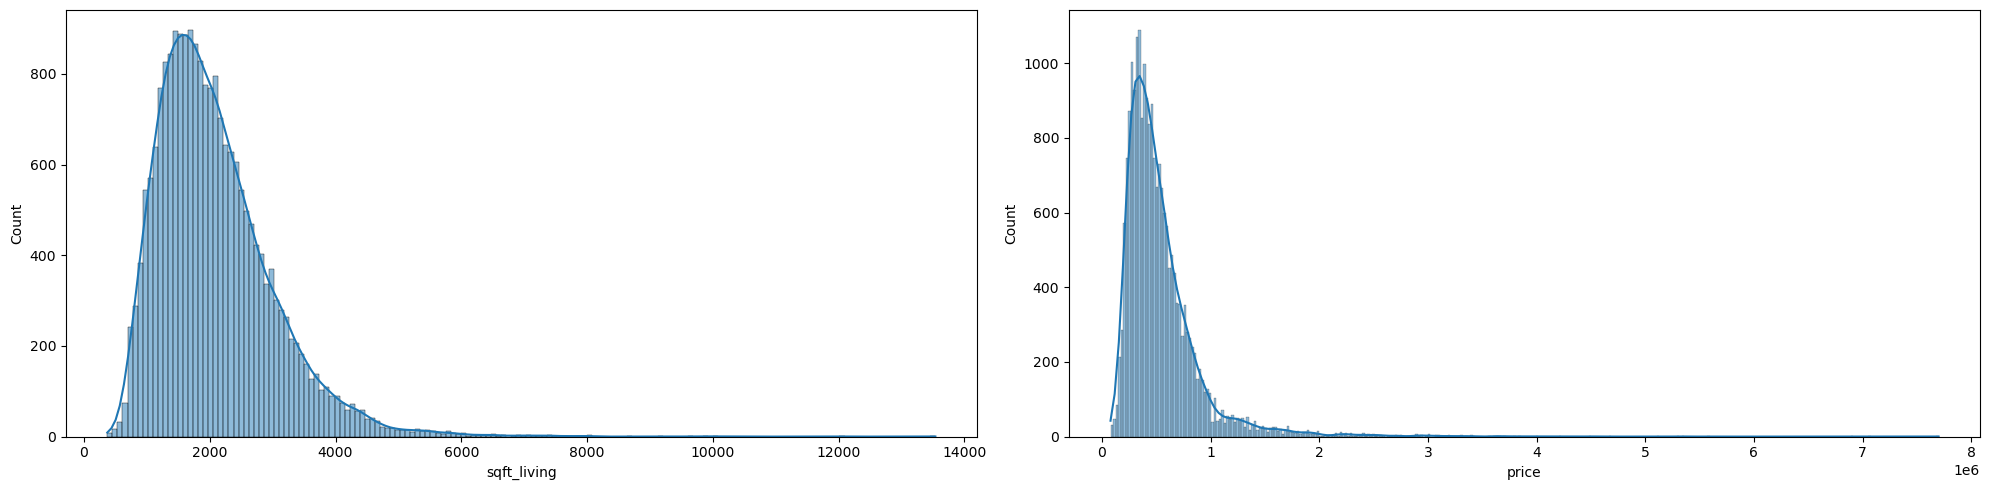

In [73]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
# sqft_living15','price'sqft_above sqft_above

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

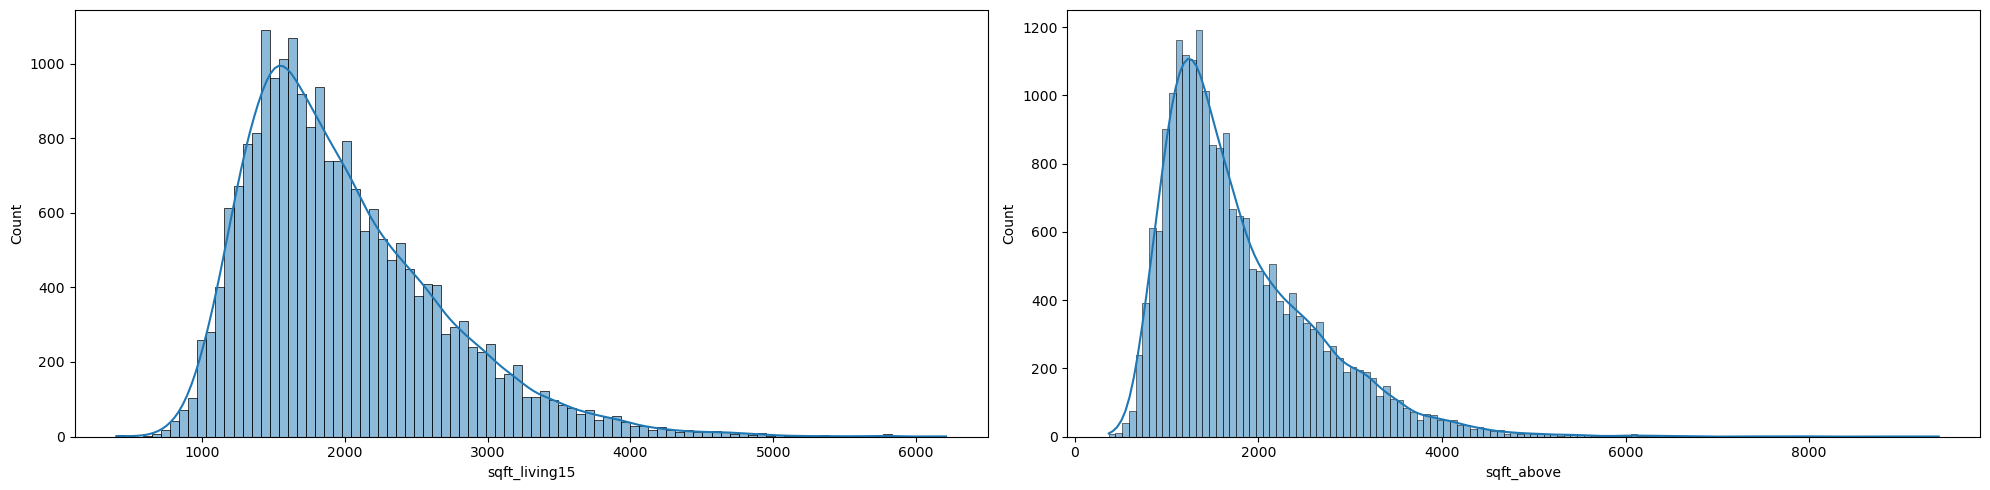

In [74]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))
# sqft_living15','price'sqft_above sqft_above

sns.histplot(data=df2, x="sqft_living15", kde=True, ax=axes[0])
sns.histplot(data=df2, x="sqft_above", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

**Investigate the presence of outliers and take steps to address them**

In [75]:
# Reduce outliers by reducing data size to 3 standard deviations

column= ['price', 'sqft_living', 'sqft_above', 'sqft_living15']

df2 = df2[~df2[column].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20729 entries, 7129300520 to 1523300157
Columns: 121 entries, price to sqft_b_2000
dtypes: float64(1), int64(3), uint8(117)
memory usage: 3.1 MB


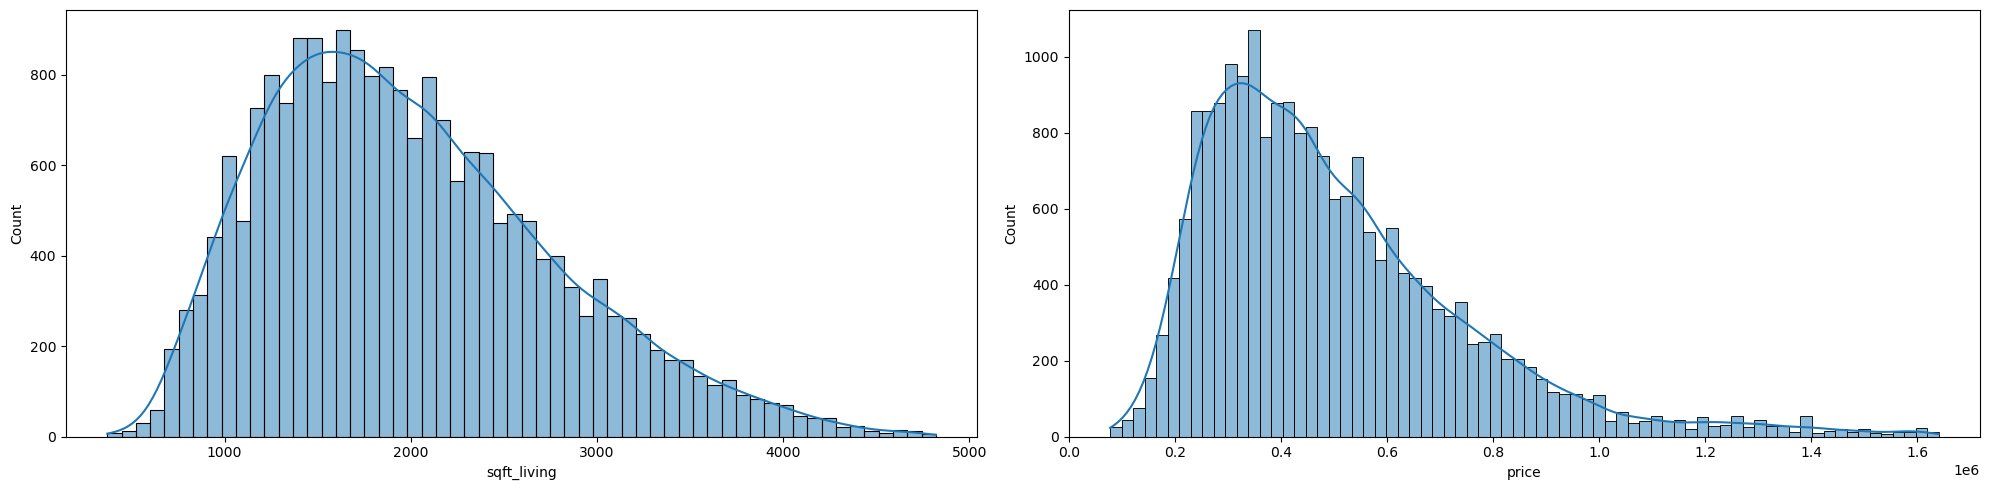

In [77]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

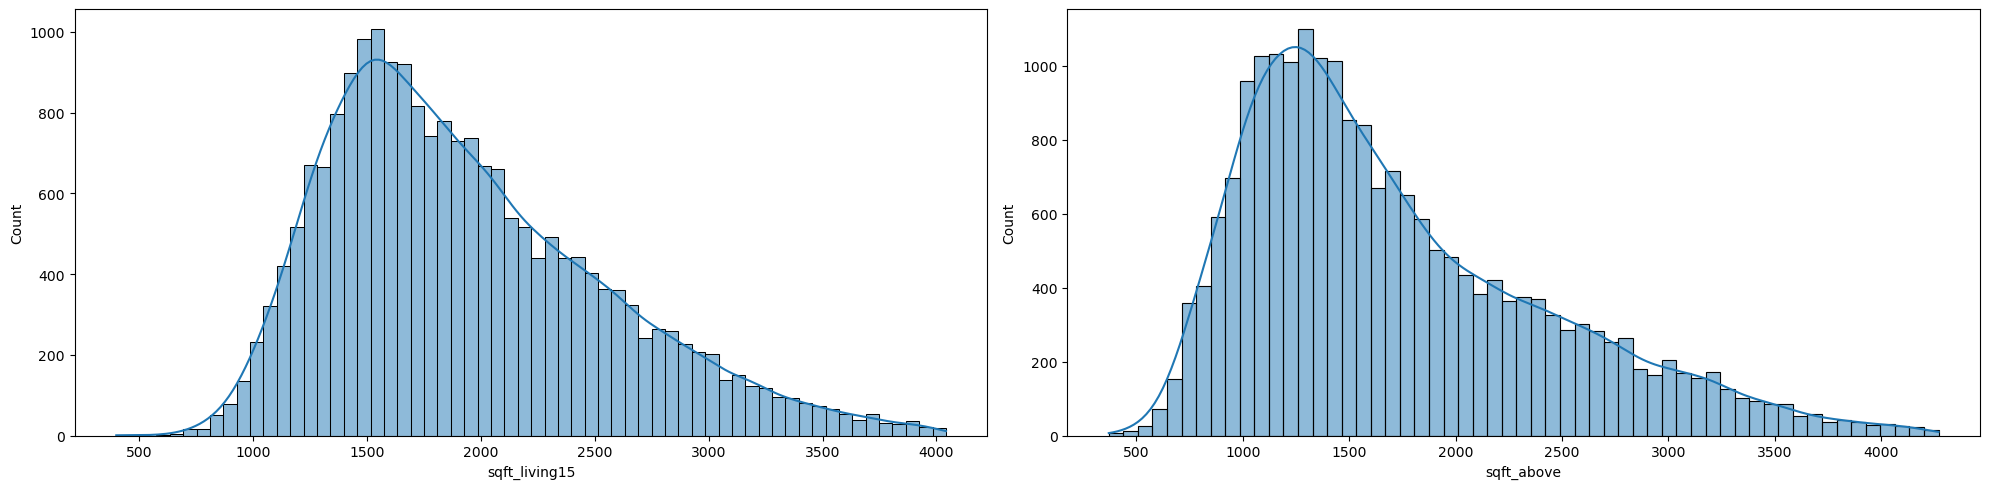

In [78]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living15", kde=True, ax=axes[0])
sns.histplot(data=df2, x="sqft_above", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

### Log Transformation

In [79]:
df2['sqft_living'] = np.log(df2['sqft_living'])
df2['price'] = np.log(df2['price'])
df2['sqft_living15'] = np.log(df2['sqft_living'])
df2['sqft_above'] = np.log(df2['price'])

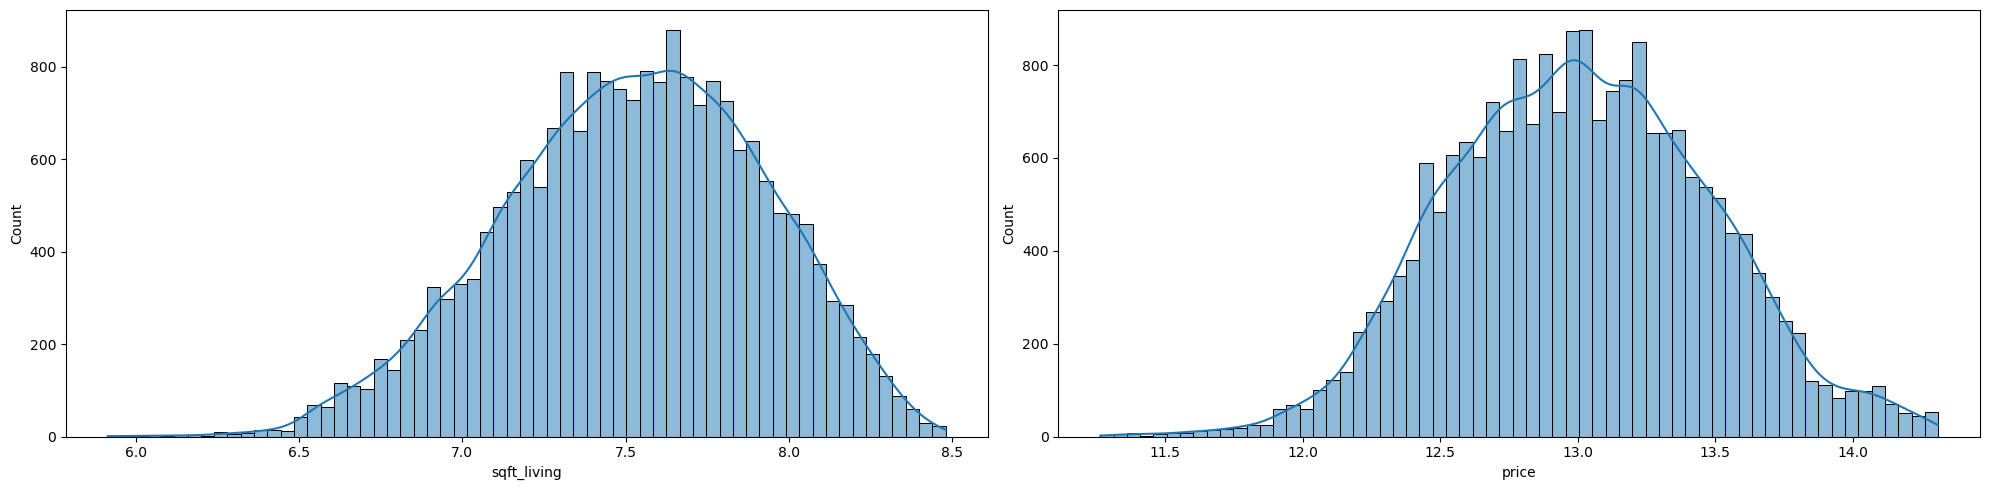

In [80]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

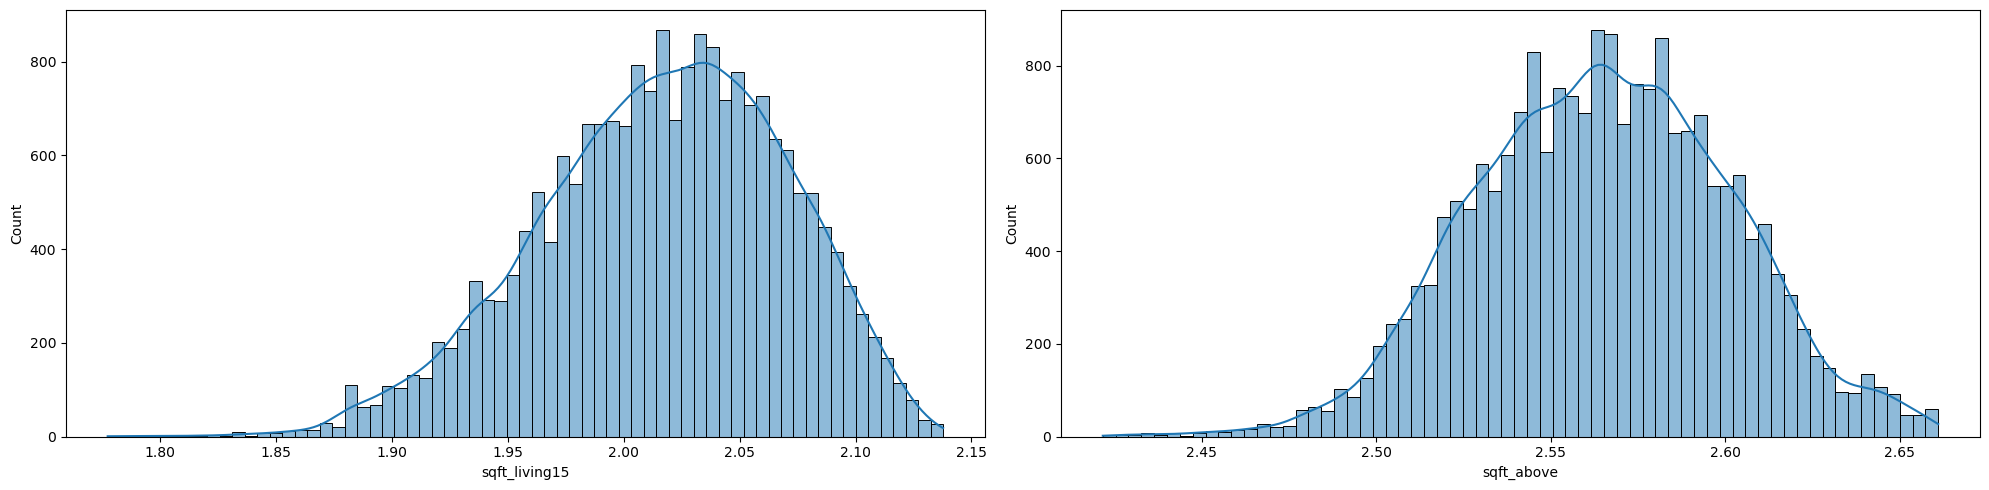

In [81]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living15", kde=True, ax=axes[0])
sns.histplot(data=df2, x="sqft_above", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

### Standardisation (Z-score Normalisation)

In [82]:
# normalize (subract mean and divide by std)
# def normalize(feature):
# return (feature - feature.mean()) / feature.std()

df2['sqft_living'] = (df2['sqft_living'] - df2['sqft_living'].mean()) / df2['sqft_living'].std()
df2['price'] = (df2['price'] - df2['price'].mean()) / df2['price'].std()
df2['sqft_living15'] = (df2['sqft_living15'] - df2['sqft_living15'].mean()) / df2['sqft_living15'].std()
df2['sqft_above'] = (df2['sqft_above'] - df2['sqft_above'].mean()) / df2['sqft_above'].std()

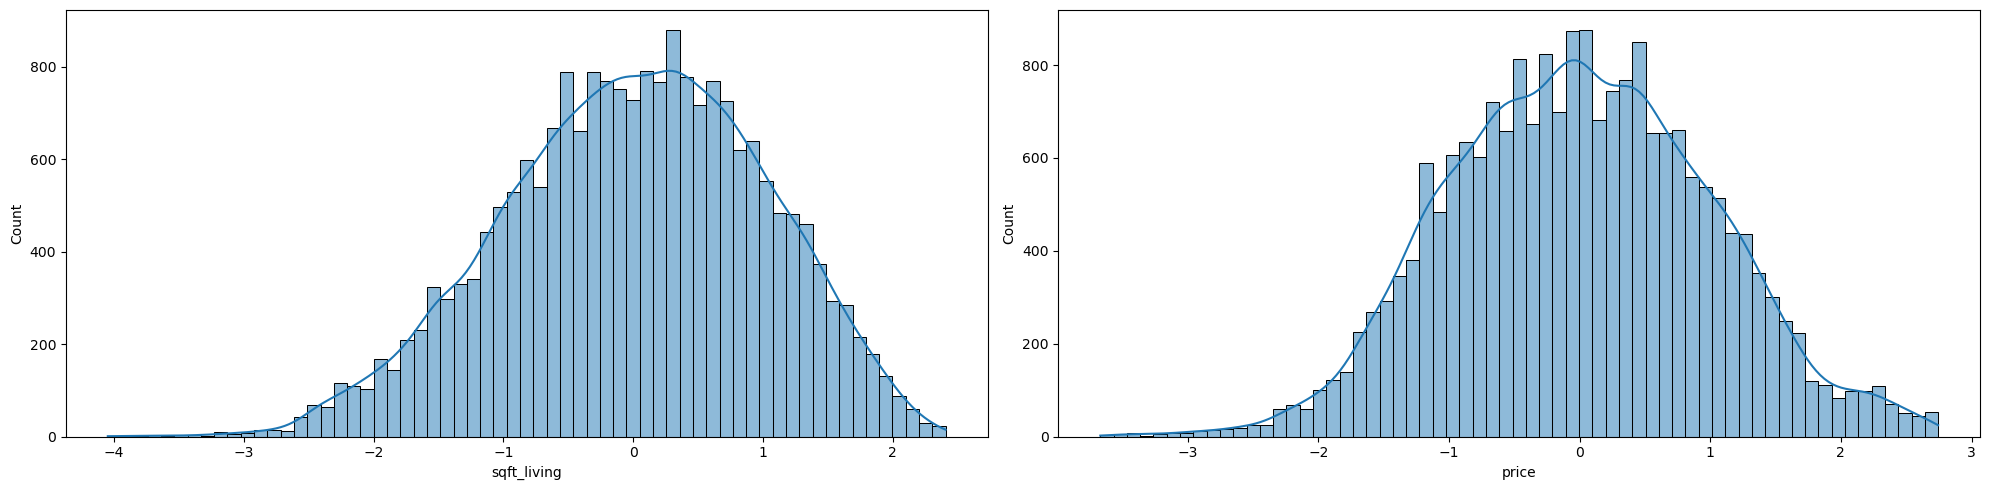

In [83]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

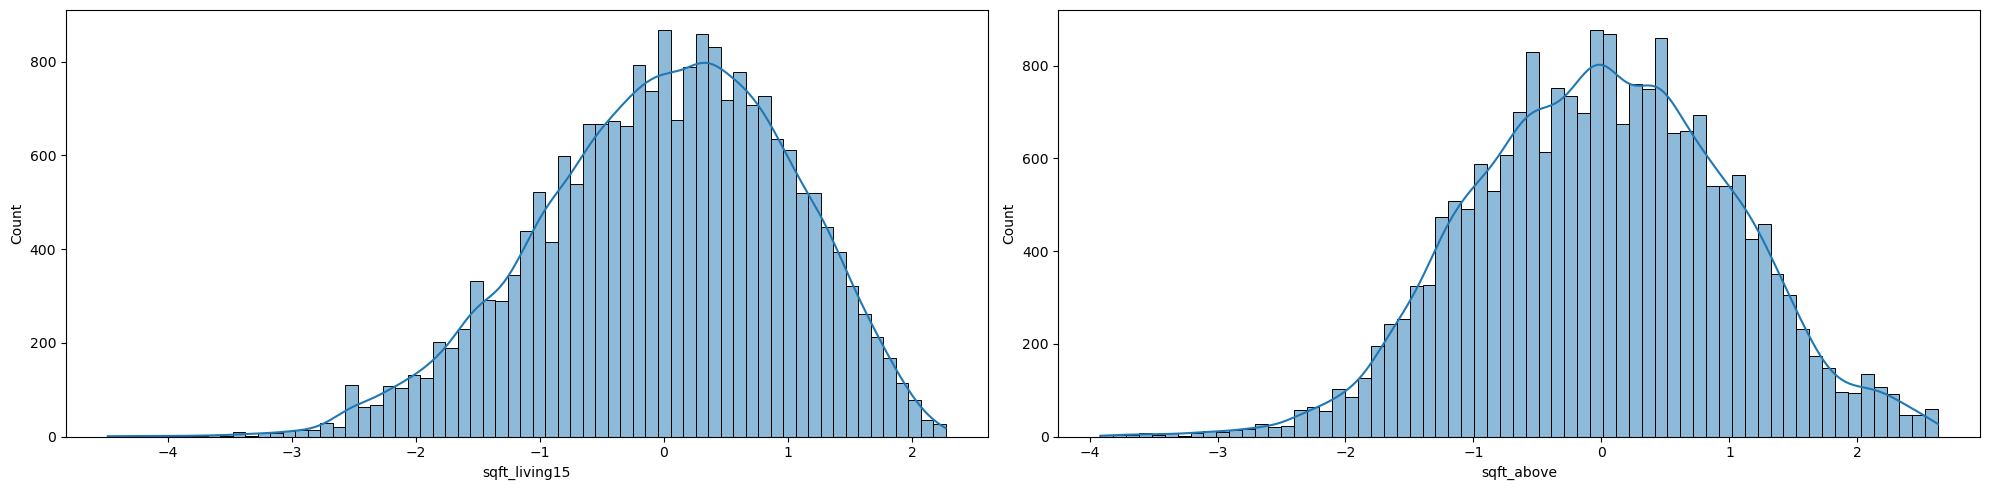

In [84]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living15", kde=True, ax=axes[0])
sns.histplot(data=df2, x="sqft_above", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

In [85]:
X = df2.drop(['price'], axis = 1)
X_columns = "+".join(X.columns)

In [86]:
ols_formula = Y + "~" + X_columns

OLS = ols(formula = ols_formula, data = df2)
model2 = OLS.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.767e+05
Date:                Tue, 26 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:33:22   Log-Likelihood:                 52593.
No. Observations:               20729   AIC:                        -1.049e+05
Df Residuals:                   20610   BIC:                        -1.040e+05
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0102      0.022      0.467      0.641      -0.033       0.053
sqft_living       0.1521      0.006     26.830      0.000       0.141       0.163
sqft_above        0.9887      0.000   2804.803      0.000       0.988       0.989
sqft_living15    -0.1485      0.006    -26.376      0.000      -0.160      -0.137
bedr_2            0.0071      0.002      4.694      0.000       0.004       0.010
bedr_3            0.0110      0.002      7.070      0.000       0.008       0.014
bedr_4            0.0096      0.002      6.017      0.000       0.006       0.013
bedr_5            0.0091      0.002      5.461      0.000       0.006       0.012
bedr_6            0.0065      0.002      3.170      0.002       0.002       0.011
bedr_7            0.0025      0.004      0.611      0.541      -0.006       0.011
bedr_8           -0.0027      0.007     -0.401      0.688      -0.016       0.010
bedr_9            0.0164      0.009      1.865      0.062      -0.001       0.034
bedr_10          -0.0034      0.011     -0.295      0.768      -0.026       0.019
bedr_11          -0.0080      0.019     -0.413      0.680      -0.046       0.030
bathr_1          -0.0231      0.010     -2.396      0.017      -0.042      -0.004
bathr_2          -0.0261      0.010     -2.715      0.007      -0.045      -0.007
bathr_3          -0.0229      0.010     -2.374      0.018      -0.042      -0.004
bathr_4          -0.0174      0.010     -1.797      0.072      -0.036       0.002
bathr_5          -0.0281      0.011     -2.532      0.011      -0.050      -0.006
bathr_6          -0.0429      0.022     -1.962      0.050      -0.086   -3.17e-05
bathr_7        4.231e-16   1.68e-16      2.521      0.012    9.41e-17    7.52e-16
bathr_8          -0.0624      0.023     -2.692      0.007      -0.108      -0.017
floors_2         -0.0002      0.000     -0.562      0.574      -0.001       0.001
floors_3         -0.0020      0.001     -2.036      0.042      -0.004   -7.54e-05
floors_4         -0.0082      0.008     -1.040      0.298      -0.024       0.007
waterfr_1         0.0170      0.003      6.559      0.000       0.012       0.022
view_1            0.0066      0.001      5.800      0.000       0.004       0.009
view_2            0.0065      0.001      9.189      0.000       0.005       0.008
view_3            0.0151      0.001     15.143      0.000       0.013       0.017
view_4            0.0292      0.002     17.956      0.000       0.026       0.032
cond_2           -0.0049      0.004     -1.247      0.212      -0.013       0.003
cond_3           -0.0184      0.004     -4.998      0.000      -0.026      -0.011
cond_4           -0.0170      0.004     -4.612      0.000      -0.024      -0.010
cond_5           -0.0124      0.004     -3.349      0.001      -0.020      -0.005
grade_4           0.0544      0.020      2.774   

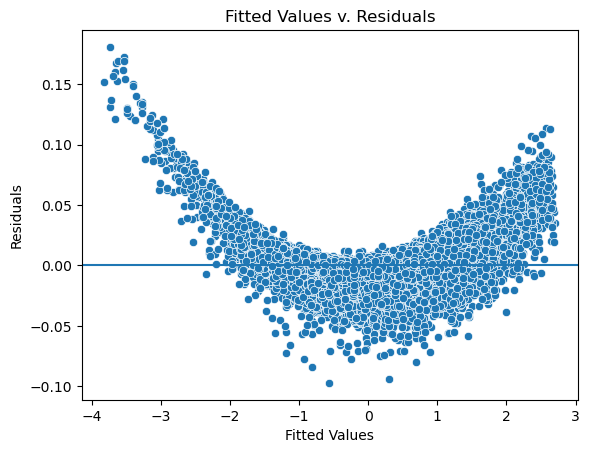

In [87]:
fig = sns.scatterplot(x = model2.fittedvalues, y = model2.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

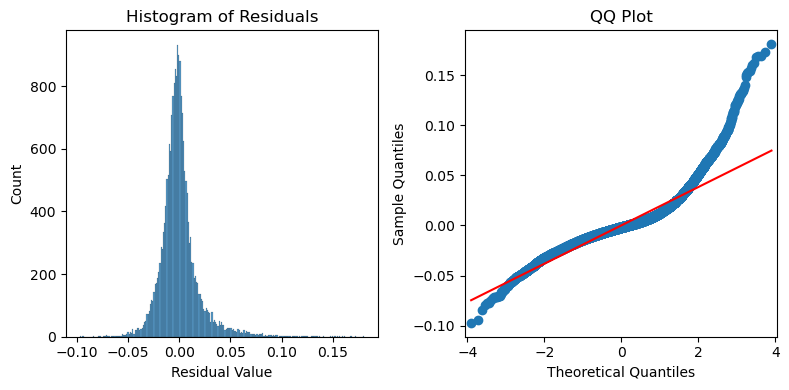

In [88]:
# Calculate the residuals.
residuals = model2.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

In [89]:
df2.corr()

price  sqft_living  sqft_above  sqft_living15    bedr_2  \
price          1.000000     0.622843    0.999689       0.618504 -0.173156   
sqft_living    0.622843     1.000000    0.622148       0.999403 -0.450776   
sqft_above     0.999689     0.622148    1.000000       0.618115 -0.173945   
sqft_living15  0.618504     0.999403    0.618115       1.000000 -0.458184   
bedr_2        -0.173156    -0.450776   -0.173945      -0.458184  1.000000   
...                 ...          ...         ...            ...       ...   
reno_1         0.093537     0.036715    0.092025       0.036118  0.006186   
sqft_b_500    -0.013975    -0.144309   -0.012282      -0.139377  0.075291   
sqft_b_1000    0.127776     0.190630    0.128304       0.195046 -0.095912   
sqft_b_1500    0.167037     0.274117    0.165872       0.269803 -0.083654   
sqft_b_2000    0.123723     0.176498    0.121535       0.169781 -0.036963   

                 bedr_3    bedr_4    bedr_5    bedr_6    bedr_7    bedr_8  \
price         -0.161815  0.224898  0.144892  0.055216  0.018510  0.009951   
sqft_living   -0.195720  0.410361  0.254006  0.113793  0.043865  0.027661   
sqft_above    -0.160246  0.224782  0.143774  0.054900  0.018602  0.010063   
sqft_living15 -0.185603  0.409821  0.249773  0.111541  0.042885  0.026901   
bedr_2        -0.363443 -0.262956 -0.104715 -0.041080 -0.014068 -0.008118   
...                 ...       ...       ...       ...       ...       ...   
reno_1        -0.015036 -0.003161  0.008435  0.021905  0.015772 -0.003853   
sqft_b_500     0.088719 -0.112311 -0.057606 -0.021535 -0.009561 -0.007856   
sqft_b_1000   -0.046055  0.089938  0.062703  0.011748 -0.006540  0.002243   
sqft_b_1500   -0.116882  0.069809  0.175506  0.098524  0.023204  0.041682   
sqft_b_2000   -0.062760  0.023681  0.103900  0.057868  0.022777  0.020781   

                 bedr_9   bedr_10   bedr_11   bathr_1   bathr_2   bathr_3  \
price          0.022096  0.014516  0.002262 -0.348475  0.024703  0.236579   
sqft_living    0.030033  0.020489  0.008434 -0.595017  0.161761  0.308366   
sqft_above     0.021670  0.014348  0.002373 -0.351892  0.030214  0.235039   
sqft_living15  0.028841  0.019695  0.008281 -0.604383  0.176222  0.303986   
bedr_2        -0.006628 -0.004687 -0.002706  0.387431 -0.203340 -0.121231   
...                 ...       ...       ...       ...       ...       ...   
reno_1         0.012719 -0.002224  0.037572 -0.015222 -0.039575  0.051041   
sqft_b_500    -0.006414 -0.004535 -0.002618  0.022177  0.003266 -0.021555   
sqft_b_1000    0.014112  0.004768  0.014784 -0.159273  0.039276  0.090629   
sqft_b_1500    0.018632  0.013174 -0.001823 -0.112709 -0.024342  0.124532   
sqft_b_2000   -0.001738  0.038446 -0.000709 -0.047733 -0.051064  0.091891   

                bathr_4   bathr_5   bathr_6  bathr_7   bathr_8  floors_2  \
price          0.245533  0.017488  0.002814      NaN  0.000148  0.293325   
sqft_living    0.283694  0.039441  0.012096      NaN  0.013674  0.403310   
sqft_above     0.241599  0.017353  0.002917      NaN  0.000275  0.293481   
sqft_living15  0.274833  0.038091  0.011646      NaN  0.013069  0.402042   
bedr_2        -0.080624 -0.009758 -0.002706      NaN -0.002706 -0.170873   
...                 ...       ...       ...      ...       ...       ...   
reno_1         0.042330 -0.004631  0.037572      NaN -0.001284  0.026120   
sqft_b_500    -0.016615 -0.003605 -0.002618      NaN -0.002618 -0.049136   
sqft_b_1000    0.074815 -0.006762 -0.003263      NaN -0.003263 -0.155358   
sqft_b_1500    0.080699  0.001272 -0.001823      NaN -0.001823 -0.120721   
sqft_b_2000    0.062162  0.054633 -0.000709      NaN -0.000709 -0.071635   

               floors_3  floors_4  waterfr_1    view_1    view_2    view_3  \
price          0.042649  0.004849   0.079542  0.092429  0.146861  0.143774   
sqft_living   -0.065614 -0.007564   0.013019  0.058070  0.104422  0.112976   
sqft_above     0.043752  0.005120   0.077804  0.091605  0.145600  0.141495   
sqft_living15 -0.0

In [90]:
abs(df2.corr()) > 0.75

price  sqft_living  sqft_above  sqft_living15  bedr_2  bedr_3  \
price           True        False        True          False   False   False   
sqft_living    False         True       False           True   False   False   
sqft_above      True        False        True          False   False   False   
sqft_living15  False         True       False           True   False   False   
bedr_2         False        False       False          False    True   False   
...              ...          ...         ...            ...     ...     ...   
reno_1         False        False       False          False   False   False   
sqft_b_500     False        False       False          False   False   False   
sqft_b_1000    False        False       False          False   False   False   
sqft_b_1500    False        False       False          False   False   False   
sqft_b_2000    False        False       False          False   False   False   

               bedr_4  bedr_5  bedr_6  bedr_7  bedr_8  bedr_9  bedr_10  \
price           False   False   False   False   False   False    False   
sqft_living     False   False   False   False   False   False    False   
sqft_above      False   False   False   False   False   False    False   
sqft_living15   False   False   False   False   False   False    False   
bedr_2          False   False   False   False   False   False    False   
...               ...     ...     ...     ...     ...     ...      ...   
reno_1          False   False   False   False   False   False    False   
sqft_b_500      False   False   False   False   False   False    False   
sqft_b_1000     False   False   False   False   False   False    False   
sqft_b_1500     False   False   False   False   False   False    False   
sqft_b_2000     False   False   False   False   False   False    False   

               bedr_11  bathr_1  bathr_2  bathr_3  bathr_4  bathr_5  bathr_6  \
price            False    False    False    False    False    False    False   
sqft_living      False    False    False    False    False    False    False   
sqft_above       False    False    False    False    False    False    False   
sqft_living15    False    False    False    False    False    False    False   
bedr_2           False    False    False    False    False    False    False   
...                ...      ...      ...      ...      ...      ...      ...   
reno_1           False    False    False    False    False    False    False   
sqft_b_500       False    False    False    False    False    False    False   
sqft_b_1000      False    False    False    False    False    False    False   
sqft_b_1500      False    False    False    False    False    False    False   
sqft_b_2000      False    False    False    False    False    False    False   

               bathr_7  bathr_8  floors_2  floors_3  floors_4  waterfr_1  \
price            False    False     False     False     False      False   
sqft_living      False    False     False     False     False      False   
sqft_above       False    False     False     False     False      False   
sqft_living15    False    False     False     False     False      False   
bedr_2           False    False     False     False     False      False   
...                ...      ...       ...       ...       ...        ...   
reno_1           False    False     False     False     False      False   
sqft_b_500       False    False     False     False     False      False   
sqft_b_1000      False    False     False     False     False      False   
sqft_b_1500      False    False     False     False     False      False   
sqft_b_2000      False    False     False     False     False      False   

               view_1  view_2  view_3  view_4  cond_2  cond_3  cond_4  cond_5  \
price           False   False   False   False   False   False   False   False   
sqft_living     False   False   False   False   False   False   False   False   
sqft_above      False   False   False   False   

In [91]:
df=df2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [92]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                                 
(price, sqft_above)           0.999689
(sqft_living15, sqft_living)  0.999403
(cond_3, cond_4)              0.814366

---
# Iteration 3

In [93]:
df3 =  df2.drop(['sqft_above', 'sqft_living15', 'cond_3'], axis = 1)

In [94]:
df3

price  sqft_living  bedr_2  bedr_3  bedr_4  bedr_5  bedr_6  \
7129300520 -1.467105    -1.131466       0       1       0       0       0   
6414100192  0.397334     0.825273       0       1       0       0       0   
5631500400 -1.907661    -2.204565       1       0       0       0       0   
2487200875  0.640939     0.144124       0       0       1       0       0   
1954400510  0.284815    -0.243384       0       1       0       0       0   
...              ...          ...     ...     ...     ...     ...     ...   
263000018  -0.448443    -0.478492       0       1       0       0       0   
6600060120 -0.226637     0.557153       0       0       1       0       0   
1523300141 -0.215609    -1.497759       1       0       0       0       0   
291310100  -0.226637    -0.366033       0       1       0       0       0   
1523300157 -0.663761    -1.497759       1       0       0       0       0   

            bedr_7  bedr_8  bedr_9  bedr_10  bedr_11  bathr_1  bathr_2  \
7129300520       0       0       0        0        0        1        0   
6414100192       0       0       0        0        0        0        1   
5631500400       0       0       0        0        0        1        0   
2487200875       0       0       0        0        0        0        0   
1954400510       0       0       0        0        0        0        1   
...            ...     ...     ...      ...      ...      ...      ...   
263000018        0       0       0        0        0        0        1   
6600060120       0       0       0        0        0        0        1   
1523300141       0       0       0        0        0        1        0   
291310100        0       0       0        0        0        0        1   
1523300157       0       0       0        0        0        1        0   

            bathr_3  bathr_4  bathr_5  bathr_6  bathr_7  bathr_8  floors_2  \
7129300520        0        0        0        0        0        0         0   
6414100192        0        0        0        0        0        0         1   
5631500400        0        0        0        0        0        0         0   
2487200875        1        0        0        0        0        0         0   
1954400510        0        0        0        0        0        0         0   
...             ...      ...      ...      ...      ...      ...       ...   
263000018         0        0        0        0        0        0         0   
6600060120        0        0        0        0        0        0         1   
1523300141        0        0        0        0        0        0         1   
291310100         0        0        0        0        0        0         1   
1523300157        0        0        0        0        0        0         1   

            floors_3  floors_4  waterfr_1  view_1  view_2  view_3  view_4  \
7129300520         0         0          0       0       0       0       0   
6414100192         0         0          0       0       0       0       0   
5631500400         0         0          0       0       0       0       0   
2487200875         0         0          0       0       0       0       0   
1954400510         0         0          0       0       0       0       0   
...              ...       ...        ...     ...     ...     ...     ...   
263000018          1         0          0       0       0       0       0   
6600060120         0         0          0       0       0       0       0   
1523300141         0         0          0       0       0       0       0   
291310100          0         0          0       0       0       0       0   
1523300157         0         0          0       0       0       0       0   

            cond_2  cond_4  cond_5  grade_4  grade_5  grade_6  grade_7  \
7129300520       0       0       0        0        0        0        1   
6414100192       0       0       0        0        0        0        1   
5631500400       0       0       0        0        0        1        0   
2487200875       0       0       1        0

In [95]:
# Reduce outliers by reducing data size to 2 standard deviations

column= ['price', 'sqft_living']

df3 = df3[~df3[column].apply(lambda x: np.abs(x - x.mean()) > 2 * x.std()).any(axis=1)]

In [96]:
X = df3.drop(['price'], axis = 1)
X_columns = "+".join(X.columns)

In [97]:
ols_formula = Y + "~" + X_columns

OLS = ols(formula = ols_formula, data = df3)
model3 = OLS.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     926.4
Date:                Tue, 26 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:33:24   Log-Likelihood:                -6737.2
No. Observations:               19183   AIC:                         1.370e+04
Df Residuals:                   19069   BIC:                         1.460e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.177e+10   1.59e+11      0.450      0.652   -2.41e+11    3.84e+11
sqft_living      0.4341      0.006     75.131      0.000       0.423       0.445
bedr_2          -0.0831      0.042     -1.972      0.049      -0.166      -0.000
bedr_3          -0.0979      0.042     -2.334      0.020      -0.180      -0.016
bedr_4          -0.1053      0.042     -2.488      0.013      -0.188      -0.022
bedr_5          -0.1585      0.043     -3.644      0.000      -0.244      -0.073
bedr_6          -0.2177      0.049     -4.439      0.000      -0.314      -0.122
bedr_7          -0.4025      0.084     -4.787      0.000      -0.567      -0.238
bedr_8          -0.3043      0.131     -2.330      0.020      -0.560      -0.048
bedr_9          -0.4066      0.205     -1.987      0.047      -0.808      -0.006
bedr_10         -0.2949      0.248     -1.188      0.235      -0.781       0.192
bedr_11          0.0718      0.348      0.206      0.837      -0.611       0.755
bathr_1          0.1780      0.200      0.890      0.373      -0.214       0.570
bathr_2          0.1570      0.200      0.785      0.433      -0.235       0.549
bathr_3          0.2206      0.200      1.102      0.271      -0.172       0.613
bathr_4          0.2435      0.201      1.214      0.225      -0.150       0.637
bathr_5          0.3342      0.232      1.441      0.150      -0.120       0.789
bathr_6         -0.2717      0.406     -0.669      0.503      -1.068       0.524
bathr_7       4.761e+08   1.06e+09      0.450      0.652    -1.6e+09    2.55e+09
bathr_8         -0.3990      0.447     -0.893      0.372      -1.274       0.476
floors_2        -0.0611      0.007     -8.468      0.000      -0.075      -0.047
floors_3        -0.2620      0.018    -14.269      0.000      -0.298      -0.226
floors_4        -0.2759      0.142     -1.948      0.051      -0.553       0.002
waterfr_1        0.6659      0.057     11.595      0.000       0.553       0.778
view_1           0.2598      0.022     11.900      0.000       0.217       0.303
view_2           0.2626      0.013     19.813      0.000       0.237       0.289
view_3           0.3966      0.020     20.103      0.000       0.358       0.435
view_4           0.6233      0.034     18.443      0.000       0.557       0.690
cond_2          -0.1988      0.033     -6.102      0.000      -0.263      -0.135
cond_4           0.0852      0.006     13.204      0.000       0.073       0.098
cond_5           0.2023      0.010     19.709      0.000       0.182       0.222
grade_4      -7.177e+10   1.59e+11     -0.450      0.652   -3.84e+11    2.41e+11
grade_5      -7.177e+10   1.59e+11     -0.450      0.652   -3.84e+11    2.41e+11
grade_6      -7.177e+10   1.59e+11     -0.450      0.652   -3.84e+11    2.41e+11
grade_7      -7.177e+10   1.59e+11     -0.450      0.652   -3.84e+11    2.41e+11
grade

In [98]:
# ols_formula = 'price ~ sqft_living + C(bedrooms) + C(bathrooms) + C(floors) + C(waterfront) + C(view) + C(condition) + C(grade) + C(sqft_basement) + C(yr_built) + C(zipcode) + C(year_sold) + C(renovated)'
# OLS = ols(formula = ols_formula, data = df3)
# model3 = OLS.fit()
# model3.summary()

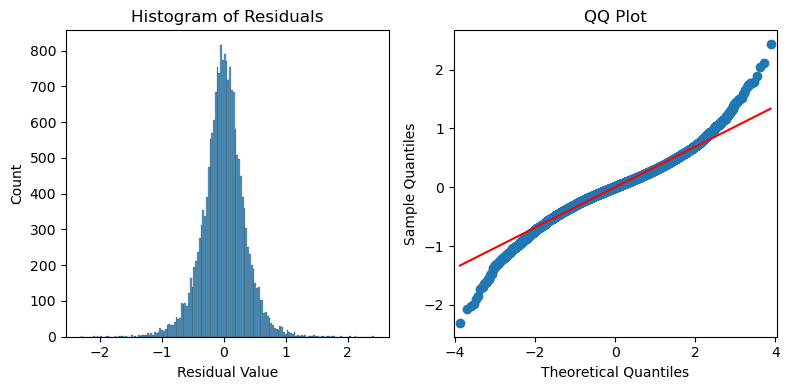

In [99]:
# Calculate the residuals.
residuals = model3.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

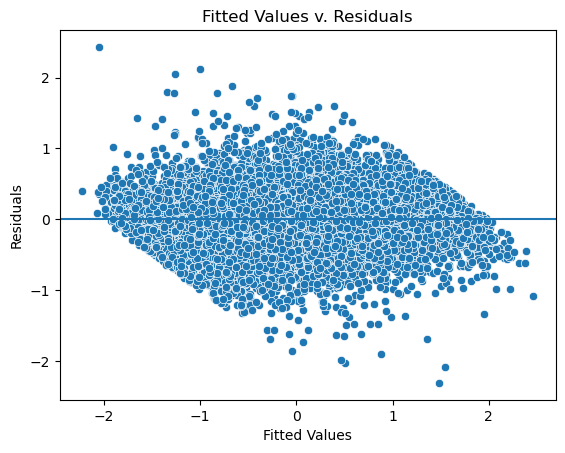

In [100]:
fig = sns.scatterplot(x = model3.fittedvalues, y = model3.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

In [101]:
df3.corr()

price  sqft_living    bedr_2    bedr_3    bedr_4    bedr_5  \
price        1.000000     0.560295 -0.102999 -0.181973  0.197995  0.107878   
sqft_living  0.560295     1.000000 -0.392576 -0.265951  0.405561  0.239812   
bedr_2      -0.102999    -0.392576  1.000000 -0.348673 -0.246514 -0.094438   
bedr_3      -0.181973    -0.265951 -0.348673  1.000000 -0.664882 -0.254712   
bedr_4       0.197995     0.405561 -0.246514 -0.664882  1.000000 -0.180083   
...               ...          ...       ...       ...       ...       ...   
reno_1       0.078965     0.021361  0.013821 -0.012816 -0.004440  0.000576   
sqft_b_500  -0.021587    -0.188350  0.105397  0.081969 -0.124128 -0.059270   
sqft_b_1000  0.104122     0.172928 -0.075230 -0.058975  0.080875  0.062308   
sqft_b_1500  0.132811     0.264987 -0.073166 -0.119121  0.061496  0.173318   
sqft_b_2000  0.084727     0.147164 -0.026605 -0.051279  0.020166  0.078505   

               bedr_6    bedr_7    bedr_8    bedr_9   bedr_10   bedr_11  \
price        0.050846  0.019379  0.012851  0.013096  0.009515  0.002723   
sqft_living  0.114763  0.043033  0.027438  0.026193  0.015841  0.009585   
bedr_2      -0.037736 -0.012726 -0.007344 -0.005192 -0.003671 -0.002596   
bedr_3      -0.101778 -0.034323 -0.019808 -0.014005 -0.009902 -0.007002   
bedr_4      -0.071958 -0.024266 -0.014004 -0.009901 -0.007001 -0.004950   
...               ...       ...       ...       ...       ...       ...   
reno_1       0.018785  0.019135 -0.003661 -0.002588 -0.001830  0.040286   
sqft_b_500  -0.022654 -0.009297 -0.007896 -0.005583 -0.003947 -0.002791   
sqft_b_1000  0.010594 -0.005519  0.003381  0.011677  0.008256  0.015123   
sqft_b_1500  0.100372  0.021563  0.037200  0.011299  0.018597 -0.001852   
sqft_b_2000  0.050734 -0.003002  0.028589 -0.001225 -0.000866 -0.000612   

              bathr_1   bathr_2   bathr_3   bathr_4   bathr_5   bathr_6  \
price       -0.269790 -0.003563  0.212094  0.191796  0.004412  0.003378   
sqft_living -0.533742  0.125096  0.300194  0.244644  0.032312  0.013873   
bedr_2       0.327534 -0.161896 -0.108346 -0.066593 -0.007790 -0.002596   
bedr_3       0.031345  0.118290 -0.150802 -0.100363 -0.021010 -0.007002   
bedr_4      -0.209044  0.063025  0.119524  0.059911 -0.009693 -0.004950   
...               ...       ...       ...       ...       ...       ...   
reno_1      -0.008166 -0.034033  0.035561  0.040855 -0.003883  0.040286   
sqft_b_500   0.046056 -0.017019 -0.024355 -0.008460 -0.001218 -0.002791   
sqft_b_1000 -0.138384  0.026612  0.082590  0.071558 -0.004153 -0.003447   
sqft_b_1500 -0.097727 -0.021459  0.117760  0.049810  0.004447 -0.001852   
sqft_b_2000 -0.035686 -0.030649  0.070891  0.021632  0.055338 -0.000612   

             bathr_7   bathr_8  floors_2  floors_3  floors_4  waterfr_1  \
price            NaN  0.000214  0.257324  0.035234  0.005849   0.052584   
sqft_living      NaN  0.015721  0.375155 -0.096506 -0.009565   0.006023   
bedr_2           NaN -0.002596 -0.137476  0.052917  0.012159   0.033704   
bedr_3           NaN -0.007002 -0.135579  0.074867  0.006442  -0.007745   
bedr_4           NaN -0.004950  0.212288 -0.090743 -0.012127  -0.016981   
...              ...       ...       ...       ...       ...        ...   
reno_1           NaN -0.001294  0.021164 -0.024050 -0.003170   0.056353   
sqft_b_500       NaN -0.002791 -0.058799 -0.007527 -0.006838   0.011145   
sqft_b_1000      NaN -0.003447 -0.186849 -0.078254 -0.008445  -0.000255   
sqft_b_1500      NaN -0.001852 -0.154388 -0.043315 -0.004537   0.025645   
sqft_b_2000      NaN -0.000612 -0.074263 -0.014748 -0.001500  -0.004292   

               view_1    view_2    view_3    view_4    cond_2    cond_4  \
price        0.086791  0.132724  0.106885  0.107649 -0.062731 -0.036384   
sqft_living  0.054395  0.089275  0.089075  0.052752 -0.048777 -0.077339   
bedr_2       0.007945 -0.000745 -0.011052  0.017261  0.027223 -0.002603   
bedr_3      -0.017365 -0.019717 -0.008771 -0.020650 -0.006397  0.018084   
b

In [102]:
abs(df3.corr()) > 0.75

price  sqft_living  bedr_2  bedr_3  bedr_4  bedr_5  bedr_6  \
price         True        False   False   False   False   False   False   
sqft_living  False         True   False   False   False   False   False   
bedr_2       False        False    True   False   False   False   False   
bedr_3       False        False   False    True   False   False   False   
bedr_4       False        False   False   False    True   False   False   
...            ...          ...     ...     ...     ...     ...     ...   
reno_1       False        False   False   False   False   False   False   
sqft_b_500   False        False   False   False   False   False   False   
sqft_b_1000  False        False   False   False   False   False   False   
sqft_b_1500  False        False   False   False   False   False   False   
sqft_b_2000  False        False   False   False   False   False   False   

             bedr_7  bedr_8  bedr_9  bedr_10  bedr_11  bathr_1  bathr_2  \
price         False   False   False    False    False    False    False   
sqft_living   False   False   False    False    False    False    False   
bedr_2        False   False   False    False    False    False    False   
bedr_3        False   False   False    False    False    False    False   
bedr_4        False   False   False    False    False    False    False   
...             ...     ...     ...      ...      ...      ...      ...   
reno_1        False   False   False    False    False    False    False   
sqft_b_500    False   False   False    False    False    False    False   
sqft_b_1000   False   False   False    False    False    False    False   
sqft_b_1500   False   False   False    False    False    False    False   
sqft_b_2000   False   False   False    False    False    False    False   

             bathr_3  bathr_4  bathr_5  bathr_6  bathr_7  bathr_8  floors_2  \
price          False    False    False    False    False    False     False   
sqft_living    False    False    False    False    False    False     False   
bedr_2         False    False    False    False    False    False     False   
bedr_3         False    False    False    False    False    False     False   
bedr_4         False    False    False    False    False    False     False   
...              ...      ...      ...      ...      ...      ...       ...   
reno_1         False    False    False    False    False    False     False   
sqft_b_500     False    False    False    False    False    False     False   
sqft_b_1000    False    False    False    False    False    False     False   
sqft_b_1500    False    False    False    False    False    False     False   
sqft_b_2000    False    False    False    False    False    False     False   

             floors_3  floors_4  waterfr_1  view_1  view_2  view_3  view_4  \
price           False     False      False   False   False   False   False   
sqft_living     False     False      False   False   False   False   False   
bedr_2          False     False      False   False   False   False   False   
bedr_3          False     False      False   False   False   False   False   
bedr_4          False     False      False   False   False   False   False   
...               ...       ...        ...     ...     ...     ...     ...   
reno_1          False     False      False   False   False   False   False   
sqft_b_500      False     False      False   False   False   False   False   
sqft_b_1000     False     False      False   False   False   False   False   
sqft_b_1500     False     False      False   False   False   False   False   
sqft_b_2000     False     False      False   False   False   False   False   

             cond_2  cond_4  cond_5  grade_4  grade_5  grade_6  grade_7  \
price         False   False   False    False    False    False    False   
sqft_living   False   False   False    False    False    False    False   
bedr_2        False   False   False    False    False    False    False   
bedr_3        False   Fal

In [103]:
df=df3.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [104]:
df[(df.cc>.75) & (df.cc <1)]

Empty DataFrame
Columns: [cc]
Index: []

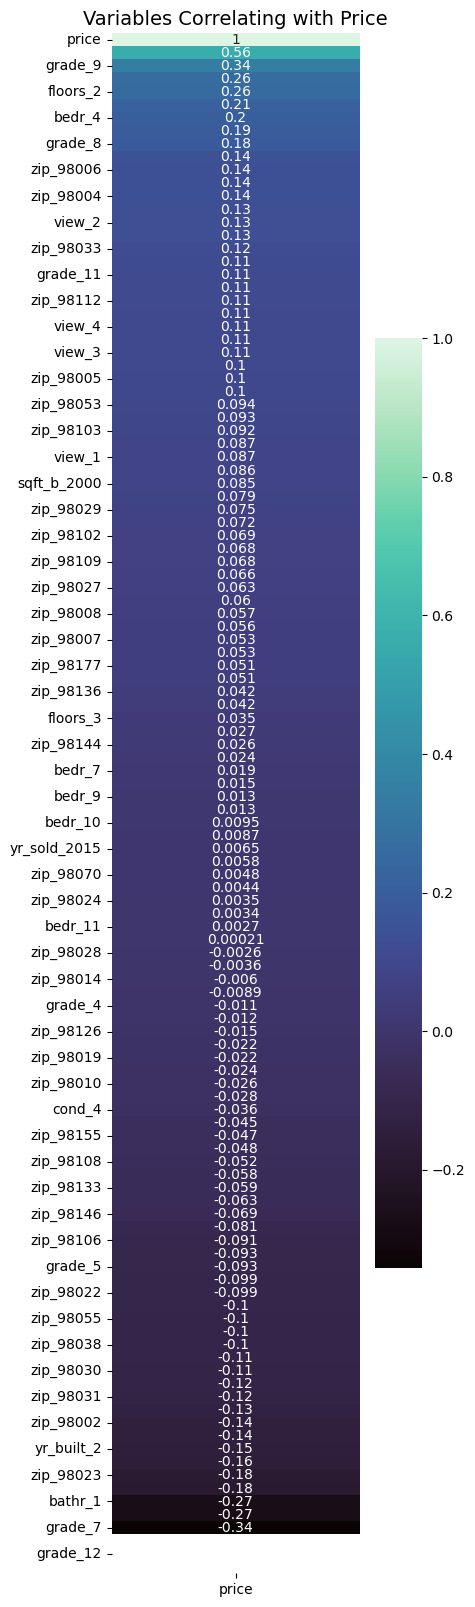

In [105]:
# Check which variables strongly correlate with price

price_corr = df3.corr()[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(4, 20))
heatmap = sns.heatmap(price_corr, annot=True, cmap='mako')
heatmap.set_title('Variables Correlating with Price', fontsize=14);

In [106]:
X

sqft_living  bedr_2  bedr_3  bedr_4  bedr_5  bedr_6  bedr_7  \
7129300520    -1.131466       0       1       0       0       0       0   
6414100192     0.825273       0       1       0       0       0       0   
2487200875     0.144124       0       0       1       0       0       0   
1954400510    -0.243384       0       1       0       0       0       0   
1321400060    -0.191550       0       1       0       0       0       0   
...                 ...     ...     ...     ...     ...     ...     ...   
263000018     -0.478492       0       1       0       0       0       0   
6600060120     0.557153       0       0       1       0       0       0   
1523300141    -1.497759       1       0       0       0       0       0   
291310100     -0.366033       0       1       0       0       0       0   
1523300157    -1.497759       1       0       0       0       0       0   

            bedr_8  bedr_9  bedr_10  bedr_11  bathr_1  bathr_2  bathr_3  \
7129300520       0       0        0        0        1        0        0   
6414100192       0       0        0        0        0        1        0   
2487200875       0       0        0        0        0        0        1   
1954400510       0       0        0        0        0        1        0   
1321400060       0       0        0        0        0        1        0   
...            ...     ...      ...      ...      ...      ...      ...   
263000018        0       0        0        0        0        1        0   
6600060120       0       0        0        0        0        1        0   
1523300141       0       0        0        0        1        0        0   
291310100        0       0        0        0        0        1        0   
1523300157       0       0        0        0        1        0        0   

            bathr_4  bathr_5  bathr_6  bathr_7  bathr_8  floors_2  floors_3  \
7129300520        0        0        0        0        0         0         0   
6414100192        0        0        0        0        0         1         0   
2487200875        0        0        0        0        0         0         0   
1954400510        0        0        0        0        0         0         0   
1321400060        0        0        0        0        0         1         0   
...             ...      ...      ...      ...      ...       ...       ...   
263000018         0        0        0        0        0         0         1   
6600060120        0        0        0        0        0         1         0   
1523300141        0        0        0        0        0         1         0   
291310100         0        0        0        0        0         1         0   
1523300157        0        0        0        0        0         1         0   

            floors_4  waterfr_1  view_1  view_2  view_3  view_4  cond_2  \
7129300520         0          0       0       0       0       0       0   
6414100192         0          0       0       0       0       0       0   
2487200875         0          0       0       0       0       0       0   
1954400510         0          0       0       0       0       0       0   
1321400060         0          0       0       0       0       0       0   
...              ...        ...     ...     ...     ...     ...     ...   
263000018          0          0       0       0       0       0       0   
6600060120         0          0       0       0       0       0       0   
1523300141         0          0       0       0       0       0       0   
291310100          0          0       0       0       0       0       0   
1523300157         0          0       0       0       0       0       0   

            cond_4  cond_5  grade_4  grade_5  grade_6  grade_7  grade_8  \
7129300520       0       0        0        0        0        1        0   
6414100192       0       0        0        0        0        1        0   
2487200875       0       1        0        0        0        1        0   
1954400510       0       0        0        0        0       

In [107]:
df3

price  sqft_living  bedr_2  bedr_3  bedr_4  bedr_5  bedr_6  \
7129300520 -1.467105    -1.131466       0       1       0       0       0   
6414100192  0.397334     0.825273       0       1       0       0       0   
2487200875  0.640939     0.144124       0       0       1       0       0   
1954400510  0.284815    -0.243384       0       1       0       0       0   
1321400060 -1.153865    -0.191550       0       1       0       0       0   
...              ...          ...     ...     ...     ...     ...     ...   
263000018  -0.448443    -0.478492       0       1       0       0       0   
6600060120 -0.226637     0.557153       0       0       1       0       0   
1523300141 -0.215609    -1.497759       1       0       0       0       0   
291310100  -0.226637    -0.366033       0       1       0       0       0   
1523300157 -0.663761    -1.497759       1       0       0       0       0   

            bedr_7  bedr_8  bedr_9  bedr_10  bedr_11  bathr_1  bathr_2  \
7129300520       0       0       0        0        0        1        0   
6414100192       0       0       0        0        0        0        1   
2487200875       0       0       0        0        0        0        0   
1954400510       0       0       0        0        0        0        1   
1321400060       0       0       0        0        0        0        1   
...            ...     ...     ...      ...      ...      ...      ...   
263000018        0       0       0        0        0        0        1   
6600060120       0       0       0        0        0        0        1   
1523300141       0       0       0        0        0        1        0   
291310100        0       0       0        0        0        0        1   
1523300157       0       0       0        0        0        1        0   

            bathr_3  bathr_4  bathr_5  bathr_6  bathr_7  bathr_8  floors_2  \
7129300520        0        0        0        0        0        0         0   
6414100192        0        0        0        0        0        0         1   
2487200875        1        0        0        0        0        0         0   
1954400510        0        0        0        0        0        0         0   
1321400060        0        0        0        0        0        0         1   
...             ...      ...      ...      ...      ...      ...       ...   
263000018         0        0        0        0        0        0         0   
6600060120        0        0        0        0        0        0         1   
1523300141        0        0        0        0        0        0         1   
291310100         0        0        0        0        0        0         1   
1523300157        0        0        0        0        0        0         1   

            floors_3  floors_4  waterfr_1  view_1  view_2  view_3  view_4  \
7129300520         0         0          0       0       0       0       0   
6414100192         0         0          0       0       0       0       0   
2487200875         0         0          0       0       0       0       0   
1954400510         0         0          0       0       0       0       0   
1321400060         0         0          0       0       0       0       0   
...              ...       ...        ...     ...     ...     ...     ...   
263000018          1         0          0       0       0       0       0   
6600060120         0         0          0       0       0       0       0   
1523300141         0         0          0       0       0       0       0   
291310100          0         0          0       0       0       0       0   
1523300157         0         0          0       0       0       0       0   

            cond_2  cond_4  cond_5  grade_4  grade_5  grade_6  grade_7  \
7129300520       0       0       0        0        0        0        1   
6414100192       0       0       0        0        0        0        1   
2487200875       0       0       1        0        0        0        1   
1954400510       0       0       0        0

In [108]:
# X = df1[['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot', 'sqft_living15', 'sqft_lot15']]

# variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif.sort_values(by='VIF', ascending=False)

VIF
grade_7       2986.660633
grade_8       2037.233166
bathr_2       1374.655639
bathr_1        878.207194
grade_9        779.975033
...                   ...
yr_sold_2015     1.012607
floors_4         1.011385
bathr_7               NaN
grade_12              NaN
grade_13              NaN

[117 rows x 1 columns]

In [109]:
df4 = df3.drop(columns=['grade_7', 'grade_8', 'bathr_2', 'bathr_1', 'bedr_3', 'bedr_4', 'grade_9', 'yr_built_2', 'floors_2', 'yr_built_3', 'cond_4', 'sqft_b_1000', 'yr_sold_2015'])

In [110]:
X = df4.drop(['price'], axis = 1)
X_columns = "+".join(X.columns)

In [ ]:
# Assuming 'X' is your feature matrix and 'y' is your target variable

# Create an ordinary least squares (OLS) model
model5 = sm.OLS(Y, X) 
# Fit a Lasso regression model with alpha (penalty strength) set to 1.0
results = model5.fit_regularized(alpha=1.0, L1_wt=1.0)  

In [122]:
# results = model4.fit_regularized(alpha=1.0, L1_wt=1.0)  # Fit a Lasso regression model with alpha (penalty strength) set to 1.0

AttributeError: 'OLSResults' object has no attribute 'fit_regularized'

In [111]:
ols_formula = Y + "~" + X_columns

OLS = ols(formula = ols_formula, data = df4)
model4 = OLS.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     855.1
Date:                Tue, 26 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:34:00   Log-Likelihood:                -8278.6
No. Observations:               19183   AIC:                         1.676e+04
Df Residuals:                   19081   BIC:                         1.756e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.0141      0.020    -49.523      0.000      -1.054      -0.974
sqft_living     0.5043      0.004    114.339      0.000       0.496       0.513
bedr_2          0.0741      0.010      7.751      0.000       0.055       0.093
bedr_5         -0.0932      0.012     -7.962      0.000      -0.116      -0.070
bedr_6         -0.1879      0.027     -6.987      0.000      -0.241      -0.135
bedr_7         -0.3681      0.079     -4.687      0.000      -0.522      -0.214
bedr_8         -0.4152      0.134     -3.105      0.002      -0.677      -0.153
bedr_9         -0.5794      0.217     -2.675      0.007      -1.004      -0.155
bedr_10        -0.4994      0.265     -1.886      0.059      -1.018       0.020
bedr_11        -0.0900      0.375     -0.240      0.810      -0.824       0.644
bathr_3         0.0698      0.009      7.458      0.000       0.051       0.088
bathr_4         0.0973      0.016      6.089      0.000       0.066       0.129
bathr_5         0.0297      0.127      0.233      0.815      -0.220       0.279
bathr_6        -0.3341      0.383     -0.872      0.383      -1.085       0.417
bathr_7      5.506e-15   1.39e-15      3.972      0.000    2.79e-15    8.22e-15
bathr_8        -0.6403      0.432     -1.481      0.139      -1.488       0.207
floors_3       -0.1571      0.017     -9.109      0.000      -0.191      -0.123
floors_4       -0.1649      0.153     -1.078      0.281      -0.465       0.135
waterfr_1       0.6071      0.062      9.765      0.000       0.485       0.729
view_1          0.2775      0.024     11.755      0.000       0.231       0.324
view_2          0.3017      0.014     21.158      0.000       0.274       0.330
view_3          0.4537      0.021     21.309      0.000       0.412       0.495
view_4          0.7179      0.036     19.673      0.000       0.646       0.789
cond_2         -0.2359      0.035     -6.716      0.000      -0.305      -0.167
cond_5          0.1354      0.010     13.018      0.000       0.115       0.156
grade_4        -0.8738      0.374     -2.336      0.020      -1.607      -0.141
grade_5        -0.2019      0.036     -5.573      0.000      -0.273      -0.131
grade_6        -0.1339      0.011    -12.062      0.000      -0.156      -0.112
grade_10        0.2994      0.016     18.739      0.000       0.268       0.331
grade_11        0.5198      0.042     12.485      0.000       0.438       0.601
grade_12    -2.316e-15   1.66e-15     -1.398      0.162   -5.56e-15    9.31e-16
grade_13    -2.819e-15   8.26e-16     -3.413      0.001   -4.44e-15    -1.2e-15
zip_98002      -0.0908      0.035     -2.597      0.009      -0.159      -0.022
zip_98003       0.0421      0.031      1.359      0.174      -0.019       0.103
zip_98004       2.2791      0.036     63.136      0.000       2.208       2.350
zip_98005       1.7326      0.037     46.75

---
# Model Validation

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df4.drop('price', axis=1)
y = df4['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [113]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [114]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [115]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.1386651842502819
Test Mean Squared Error:  4.2644162725753e+19


In [116]:
# X = df1[['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot', 'sqft_living15', 'sqft_lot15']]

# variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif.sort_values(by='VIF', ascending=False)

VIF
sqft_living  2.111468
bedr_2       1.438183
waterfr_1    1.357417
bedr_9       1.344982
bathr_8      1.339767
...               ...
zip_98148    1.002546
zip_98039    1.000524
bathr_7           NaN
grade_12          NaN
grade_13          NaN

[104 rows x 1 columns]

In [117]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [118]:
ridge_model = Ridge(alpha=1).fit(X_train,y_train)

In [119]:
ridge_model.score(X_test,y_test)

0.8151528781330762

In [120]:
lasso_model = Lasso(alpha=1).fit(X_train,y_train)

In [121]:
lasso_model.score(X_test,y_test)

-0.0005914605897709979